# Who feeds the world ? And how wealthy are they ?
There are **folium maps** in this notebook. If they do not display or do not display well, we suggest you to **have a look at the `.html` file** that is located the same repository.

## Abstract <a name="abstract"></a>

Are countries that plant more maize richer than countries planting rice? Is it true that developed countries produce more meat? Are you better off being a food net exporter or importer? Are food prices more stable if you produce more food locally or trade more?

In this project we analyze **the effects that a country agricultural sector has on its different economic indicators**. The indicators of the agricultural sector we used are crops and livestock **production, exports and imports** of **crops, livestock and live animals**. For these, we use the data from the "**Global Food & Agriculture Statistics**" datasets. We quantify the **economic success** by **Gross Domestic Product (GDP)**, but also by **price stability**, as defined by low changes in **Consumer Price Indices (CPI)**. We further use the **Food and Agriculture Organization (FAO)** definition of **food self-sufficiency** to analyze its link to economic success and stability. 
After finding the results of the agricultural products most highly linked with economic success, we create **visualizations** in the form of **maps**. Through these timeline maps, we show how the production/export/import of important products has developed globally. We also use maps to visualize the **level of food self-sufficiency and price stability**.




## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- Which **agricultural products** are the **most produced/exported/imported** globally?
- Which of them are **correlated more highly with GDP**?
- Can we **predict** which countries will have **further GDP growth** based on the repartition of their agricultural sector?
- How can we define **price stability**? How can we define **food self-sufficiency**? Is there a link?
- What is countries **agricultural trade balance**? Are countries that are net exporters or importers richer ? Are self-sufficient countries **richer** ?
- How does the geographical repartition of important agricultural products look like? Which countries are **net food exporters or importers**? How did this **evolve over the last few decades** ?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
    
    7. [The last filter](#1G)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)  
                
    3. [Structure of international trade and historical context](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    2. [Food self-sufficiency](#3B)

    3. [Analysis of food production and trade with GDP](#3C)

    4. [Food prices stability and agricultural features](#3D)      

4. [Informed plan for next actions](#4)

**External imports:**

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display
import scipy.cluster.hierarchy as spc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from operator import itemgetter
from sklearn import preprocessing
from tqdm import tqdm

**Setup:**

In [4]:
data_folder_path = "Scripts/Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Food trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Consumer price indices" : "ConsumerPriceIndices_E_All_Data_(Normalized).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unuseful data](#1Da)         
        
        2. [Handling of the missing data](#1Db)       
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset is a subset of the **"Global Food & Agriculture Statistics"** that is found **in the proposed datasets list**. In this dataset, we have seen that we could work with the **production** as well as **import** and **export** quantities **per year** and **per country**. As far as food is concerned, we use **crops**, **livestock** and **live animals**. We have also found pieces of information about countries **GDP** and **CPI** in this database.

This database countains several files. We had a look of all the files. For food-related data about countries, we decided to focus on the following files:
- `Production_Crops_E_All_Data_(Normalized).csv` contains data about **crops production**.
- `Trade_Crops_Livestock_E_All_Data_(Normalized).csv` contains data about **food trade** (crops and livestock).
- `Production_Livestock_E_All_Data_(Normalized).csv` contains data about **livestock production**.
- `Trade_LiveAnimals_E_All_Data_(Normalized).csv` contains data about **live animals trade**.

For food-related data about countries, we decided to focus on the following files:
- `ConsumerPriceIndices_E_All_Data_(Normalized).csv` contains data about **consumer price indices (CPI)**.
- `Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv` contains data about **gross domestic product (GDP)** along with other macroeconomic indicators.

### 1.B. Loading the data set  <a name="1B"></a>

In [5]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We **load each interresting dataset** in the dictionary `df` :

In [6]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to **get a first sense of the data**.

In [7]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [8]:
display_df(df, interesting_datasets)

'Crops production'

Area Code                                     Area  Item Code  \
2585339       5817  Net Food Importing Developing Countries        587   
1864120        251                                   Zambia         27   
1831062        237                                 Viet Nam        689   
895308         109                                  Jamaica        497   
1991406       5103                          Northern Africa         79   

                              Item  Element Code         Element  Year Code  \
2585339                 Persimmons          5312  Area harvested       1982   
1864120                Rice, paddy          5419           Yield       1970   
1831062  Chillies and peppers, dry          5419           Yield       1986   
895308            Lemons and limes          5510      Production       1977   
1991406                     Millet          5525            Seed       2000   

         Year    Unit    Value Flag  
2585339  1982      ha      0.0    A  
1864120  1970   hg/ha   4079.0   Fc  
1831062  1986   hg/ha  12222.0   Fc  
895308   1977  tonnes  20000.0    F  
1991406  2000  tonnes  29987.0    A

'Food trade'

Area Code           Area  Item Code                         Item  \
2692953         47   Cook Islands        394  Pumpkins, squash and gourds   
2973211         50         Cyprus       1069                   Meat, duck   
7248322        153  New Caledonia       1225                       Tallow   
1781992        115       Cambodia       1232                Food prep nes   
495545          10      Australia       1977            Rape+Mustard Oils   

         Element Code          Element  Year Code  Year      Unit  Value Flag  
2692953          5622     Import Value       1967  1967  1000 US$    0.0  NaN  
2973211          5622     Import Value       1992  1992  1000 US$    NaN    M  
7248322          5622     Import Value       1967  1967  1000 US$    NaN    M  
1781992          5910  Export Quantity       1970  1970    tonnes  229.0  NaN  
495545           5922     Export Value       1985  1985  1000 US$    0.0    A

'Consumer price indices'

Area Code        Area  Item Code  \
53276        208  Tajikistan      23013   
56859        230     Ukraine      23012   
35449        273  Montenegro      23013   
5391          53       Benin      23012   
56955        230     Ukraine      23012   

                                                Item  Months Code    Months  \
53276     Consumer Prices, Food Indices (2010 = 100)         7002  February   
56859  Consumer Prices, General Indices (2010 = 100)         7005       May   
35449     Consumer Prices, Food Indices (2010 = 100)         7005       May   
5391   Consumer Prices, General Indices (2010 = 100)         7007      July   
56955  Consumer Prices, General Indices (2010 = 100)         7010   October   

       Year Code  Year  Unit       Value Flag            Note  
53276       2017  2017   NaN  161.900000    X            2010  
56859       2003  2003   NaN   41.410725    X            2010  
35449       2015  2015   NaN  100.691519    X  previous month  
5391        2014  2014   NaN  109.746589    X            2010  
56955       2011  2011   NaN  108.160021    X            2010

'Macroeconomy'

Area Code         Area  Item Code  \
283739        131     Malaysia      22015   
140948         54      Denmark      22077   
511532        155      Vanuatu      22008   
2088            2  Afghanistan      22077   
303505        138       Mexico      22011   

                                                   Item  Element Code  \
283739                    Gross Fixed Capital Formation          6108   
140948  Value Added (Manufacture of food and beverages)          6108   
511532                           Gross Domestic Product          6156   
2088    Value Added (Manufacture of food and beverages)          6109   
303505                            Gross National Income          6109   

                                          Element  Year Code  Year      Unit  \
283739                     Value US$, 2005 prices       2007  2007  millions   
140948                     Value US$, 2005 prices       1979  1979  millions   
511532  Annual growth Local Currency, 2005 prices       2010  2010         %   
2088                         Value Local Currency       2004  2004  millions   
303505                       Value Local Currency       2000  2000  millions   

               Value Flag  
283739  3.754279e+04  XAM  
140948           NaN  NaN  
511532  1.629111e+00   Fc  
2088             NaN  NaN  
303505  5.984978e+06  XAM

'Livestock production'

Area Code                              Area  Item Code      Item  \
33779         250  Democratic Republic of the Congo        976     Sheep   
139473       5206                         Caribbean        866    Cattle   
104372        200                         Singapore       1057  Chickens   
132361       5101                    Eastern Africa       1016     Goats   
124220        228                              USSR       1096    Horses   

        Element Code Element  Year Code  Year       Unit       Value Flag  
33779           5111  Stocks       2007  2007       Head    901370.0  NaN  
139473          5111  Stocks       1970  1970       Head   9340952.0    A  
104372          5112  Stocks       1979  1979  1000 Head      4700.0    F  
132361          5111  Stocks       1999  1999       Head  65637144.0    A  
124220          5111  Stocks       1964  1964       Head   8500000.0  NaN

'Live animals trade'

Area Code                     Area  Item Code             Item  \
570874       5206                Caribbean        976            Sheep   
550731       5104          Southern Africa       1922  Sheep and Goats   
207934         91                   Guyana       1982   Food Excl Fish   
270694        124                    Libya       1126           Camels   
627072       5501  Australia & New Zealand       1181         Beehives   

        Element Code          Element  Year Code  Year      Unit     Value  \
570874          5608  Import Quantity       2012  2012      Head     750.0   
550731          5908  Export Quantity       2009  2009      Head  354833.0   
207934          5622     Import Value       1962  1962  1000 US$   13004.0   
270694          5608  Import Quantity       2012  2012      Head       0.0   
627072          5922     Export Value       1975  1975  1000 US$       NaN   

       Flag  
570874    A  
550731    A  
207934    A  
270694    F  
627072    A

At first glance, our datasets **seem very clean**.

Each of our dataset contains **a column "Year"** and a column that is named **"Area"**. This is a great news for us since we want to do a both **geographical and time-related analysis**.

The column **"Area"** correspond to the country except it **may contains a group of country** (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will **clean the datasets**. The **final goal is to produce one uniformized dataset** on which we could work (see [1.F.](#1F)).

In a very simplistic way, such a cleaned and uniformized dataset may look like this :

    Country | Year | GDP | CPI | Food production features | Food trade features

1.  
    4. 
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            3. [Extracting stocks production from the "Livestock production" dataset](#1Daiii)
            
            4. [Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets](#1Daiv)
            5. [Extracting average CPI of each year from the "Consumer price indices" dataset](#1Dav)
            
            6. [Removing areas which are not countries](#1Davi)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)     

#### 1.D.a. Removing unuseful data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes **without the unuseful data**.

In [9]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>
The "Macroeconomy" dataset contains **many different measures**: Gross Fixed Capital Formation, Gross National Income, Value Added (Total Manufacturing), ... We are **only interested in Gross Domestic Product**. Therefore, we extract it Gross Domestic Product from the "Macroeconomy" dataset. In order to have uniformisation among values, we choose the US$ value. All of them have the same unit (millions US\\$) so we can drop the "Unit" column as well.

In [10]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [11]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

We can have have a look at a sample of the extrated dataset:

In [12]:
display(df_useful["GDP"].sample(5))

Area Code                      Area  Year         Value
537948       5105            Western Africa  1973  5.173818e+04
502500        231  United States of America  2000  1.028478e+07
528527        181                  Zimbabwe  2001  7.495469e+03
381436        179                     Qatar  2011  1.677753e+05
475505        220       Trinidad and Tobago  1976  2.500630e+03

And we can plot GDP in million US$ for different countries for the period 1970-2015:

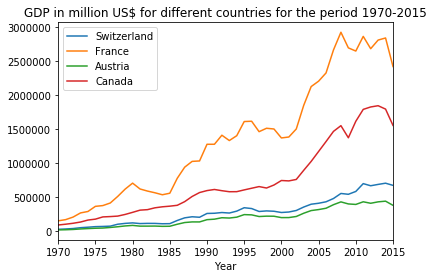

In [13]:
select_switzerland = df_useful["GDP"]['Area']=='Switzerland'
select_france = df_useful["GDP"]['Area']=='France'
select_austria = df_useful["GDP"]['Area']=='Austria'
select_canada = df_useful["GDP"]['Area']=='Canada'
ax = df_useful["GDP"][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

For dissolute or new countries, we have some Nan values (before appearing or after dissolution) as in this next example :

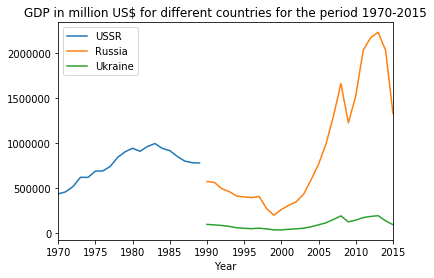

In [14]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>
We want to extract crops **harvested area**, **production**, **seed** and **yield** from the **"Crops production" dataset**. As all crops are not food crops, we request the [World crops database](https://world-crops.com/food-crops/) to **keep only the food crops**.

In [15]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [16]:
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

We check everything is fine by looking at samples for each of the new dataframes:

In [17]:
display('Crops Production', df_useful['Crops Production'].sample(5))

'Crops Production'

Area Code             Area                       Item  Year    Unit  \
1218613        157        Nicaragua  Cereals (Rice Milled Eqv)  1963  tonnes   
540168          58          Ecuador                   Coconuts  2008  tonnes   
2216863       5303    Southern Asia                   Cherries  2011  tonnes   
355923          41  China, mainland           Fruit, stone nes  2009  tonnes   
1103453        138           Mexico        Lettuce and chicory  1969  tonnes   

            Value  
1218613  214660.0  
540168    21195.0  
2216863  149821.0  
355923   125000.0  
1103453    9000.0

We also make some plots to have a first understanding of the dataset:

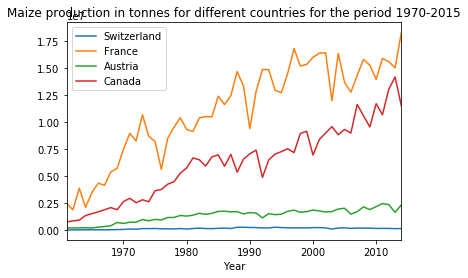

In [18]:
select_Maize = df_useful['Crops Production']['Item']=='Maize'
maize_df = df_useful['Crops Production'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize production in tonnes for different countries for the period 1970-2015')

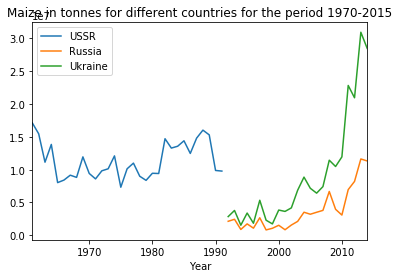

In [19]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize in tonnes for different countries for the period 1970-2015')

##### 1.D.a.iii. Extracting stocks production from the "Livestock production" dataset<a name="1Daiii"></a>

We want to extract **stocks production** from the **"Livestock production" dataset**. Again, we drop the columns that are useless for us and have a first look of the data with a sample and some plots.

In [20]:
selection_stocks = df['Livestock production']["Element"] == 'Stocks'
df_useful['Livestock production'] = df['Livestock production'][selection_stocks].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [21]:
display(df_useful['Livestock production'].sample(5))

Area Code                               Area                  Item  \
54883          97                            Hungary  Cattle and Buffaloes   
141443       5300                               Asia             Buffaloes   
160084       5815  Low Income Food Deficit Countries     Rabbits and hares   
92229         173                             Poland               Turkeys   
30163         107                      Côte d'Ivoire       Sheep and Goats   

        Year       Unit        Value  
54883   1996       Head     928000.0  
141443  1996       Head  155363429.0  
160084  2000  1000 Head     110627.0  
92229   1966  1000 Head       1483.0  
30163   1970       Head    1665000.0

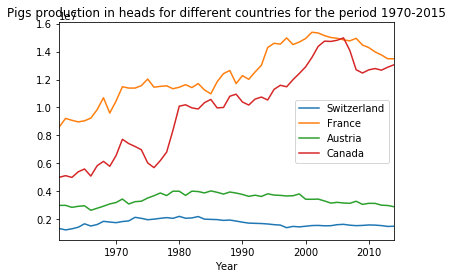

In [22]:
select_pigs = df_useful['Livestock production']['Item']=='Pigs'
pigs_df = df_useful['Livestock production'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

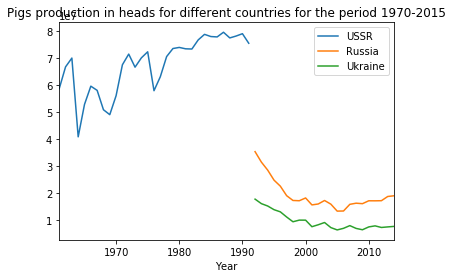

In [23]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

##### 1.D.a.iv. Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets<a name="1Daiv"></a>
Now, we extract **import and export quantities** from the **"Live animals trade" and "Crops trade" datasets**, having again some samples and some plots.

In [24]:
selection_import_quantities = df['Live animals trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Live animals trade']["Element"] == 'Export Quantity'

df_useful['Live animals import quantities'] = df['Live animals trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Live animals export quantities'] = df['Live animals trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [25]:
display(df_useful['Live animals import quantities'].sample(5))

Area Code                       Area                  Item  Year  \
478737        225       United Arab Emirates  Pigeons, other birds  1997   
394627        190  Saint Pierre and Miquelon                  Pigs  1969   
266641        122                    Lesotho                Cattle  1987   
116849         45                    Comoros               Turkeys  1999   
106913         41            China, mainland              Chickens  1974   

             Unit   Value  
478737  1000 Head     NaN  
394627       Head   569.0  
266641       Head  3662.0  
116849  1000 Head     NaN  
106913  1000 Head     0.0

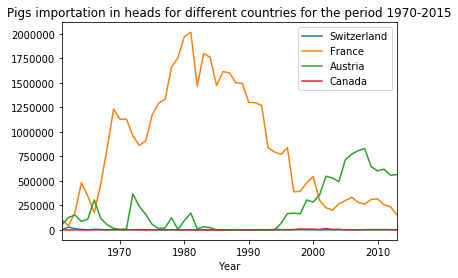

In [26]:
select_pigs = df_useful['Live animals import quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals import quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs importation in heads for different countries for the period 1970-2015')

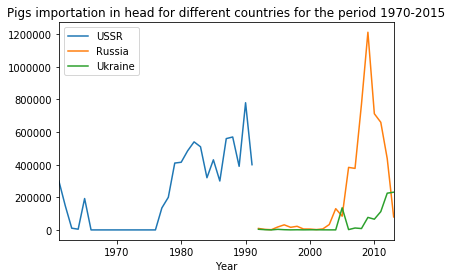

In [27]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs importation in head for different countries for the period 1970-2015')

In [28]:
display(df_useful['Live animals export quantities'].sample(5))

Area Code                 Area               Item  Year       Unit  \
60245          21               Brazil          Buffaloes  1999       Head   
441582        210               Sweden    Camelids, other  1969       Head   
147191         55             Dominica    Bovine, Animals  1973       Head   
132639         50               Cyprus  Rabbits and hares  2010  1000 Head   
463228        220  Trinidad and Tobago           Chickens  1993  1000 Head   

        Value  
60245     0.0  
441582    NaN  
147191    0.0  
132639    0.0  
463228  104.0

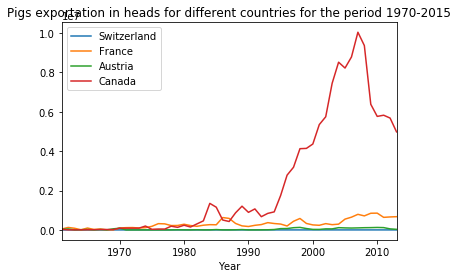

In [29]:
select_pigs = df_useful['Live animals export quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals export quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

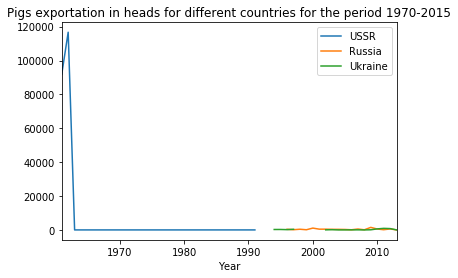

In [30]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

In [31]:
selection_import_quantities = df['Food trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Food trade']["Element"] == 'Export Quantity'

df_useful['Food import quantities'] = df['Food trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Food export quantities'] = df['Food trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [32]:
display(df_useful['Food import quantities'].sample(5))

Area Code                                     Area  \
10540107        227                                   Tuvalu   
303021            9                                Argentina   
3662644          62                             Ethiopia PDR   
14531025       5817  Net Food Importing Developing Countries   
9340828          25                          Solomon Islands   

                              Item  Year    Unit  Value  
10540107       Fruit, prepared nes  1966  tonnes    0.0  
303021                  Oil, maize  1981  tonnes    0.0  
3662644          Rape+Mustard Oils  1972  tonnes   11.0  
14531025  Oils, fats of animal nes  2008  tonnes  596.0  
9340828                  Meat, nes  1975  tonnes    NaN

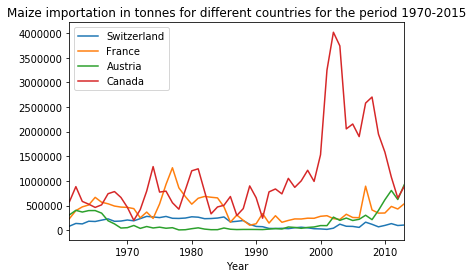

In [33]:
select_Maize = df_useful['Food import quantities']['Item']=='Maize'
maize_df = df_useful['Food import quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

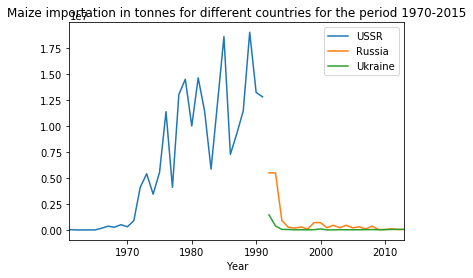

In [34]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

In [35]:
display(df_useful['Food export quantities'].sample(5))

Area Code              Area                                   Item  \
3400132          58           Ecuador                  Vegetables in vinegar   
7697043         221              Oman                      Juice, grapefruit   
9731012         207          Suriname                               Tomatoes   
12818020       5300              Asia                   Oil, coconut (copra)   
2295901         128  China, Macao SAR  Coffee, substitutes containing coffee   

          Year    Unit      Value  
3400132   1991  tonnes        0.0  
7697043   1990  tonnes        NaN  
9731012   1993  tonnes        NaN  
12818020  2000  tonnes  1875223.0  
2295901   1991  tonnes        0.0

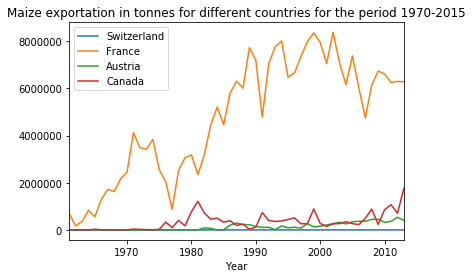

In [36]:
select_Maize = df_useful['Food export quantities']['Item']=='Maize'
maize_df = df_useful['Food export quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

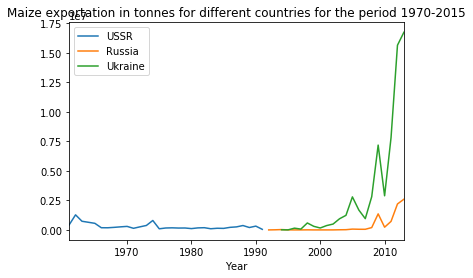

In [37]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

##### 1.D.a.v. Extracting average CPI of each year from the "Consumer price indices" dataset<a name="1Dav"></a>

The **"Consumer price indices" dataset** contains **monthly data**. In order to have a **uniform dataframe**, and as other dataframes have **yearly data**, we will group it by (Country, Year) and compute the monthly mean for every year. Then we add a column to show the relative change in CPI, as this is what measures inflation, according to the following formula:

$$\frac{CPI_t - CPI_{t-1}}{CPI_{t-1}}$$

In [38]:
df_useful['Consumer price indices'] =  df['Consumer price indices'][['Area','Year','Value']] \
                                        .dropna() \
                                        .groupby(['Area',"Year"]) \
                                        .mean() \
                                        .reset_index() \
                                        .dropna()

In [39]:

#We calculate the relative change in CPI for each year relative to last years CPI - this indicates yearly inflation. The first year in each area is set to 0.


df_useful['Consumer price indices']['Value'] = np.where(df_useful['Consumer price indices']['Area'] == df_useful['Consumer price indices']['Area'].shift(1),
         ((df_useful['Consumer price indices']['Value'] - df_useful['Consumer price indices']['Value'].shift(1))/df_useful['Consumer price indices']['Value'].shift(1)) * 100, 0)




In [40]:
display(df_useful['Consumer price indices'].head(5))

Area  Year      Value
0  Afghanistan  2004   0.000000
1  Afghanistan  2005  11.606340
2  Afghanistan  2006   7.254896
3  Afghanistan  2007   8.482889
4  Afghanistan  2008  30.554940

With samples and plots, we remark that this dataset **only starts in 2000** wheareas other ones start in 1970.

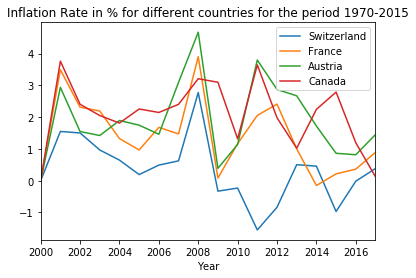

In [41]:
select_switzerland = df_useful['Consumer price indices']['Area']=='Switzerland'
select_france = df_useful['Consumer price indices']['Area']=='France'
select_austria = df_useful['Consumer price indices']['Area']=='Austria'
select_canada = df_useful['Consumer price indices']['Area']=='Canada'
ax = df_useful['Consumer price indices'][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful['Consumer price indices'][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

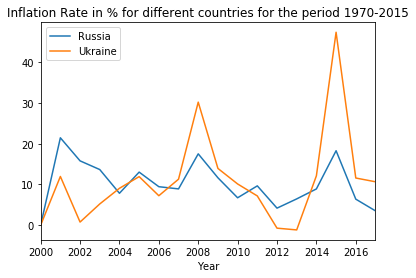

In [42]:
select_russia = df_useful["Consumer price indices"]['Area']=='Russian Federation'
select_ukraine = df_useful["Consumer price indices"]['Area']=='Ukraine'
ax = df_useful["Consumer price indices"][select_russia].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["Consumer price indices"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(['Russia', 'Ukraine'])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

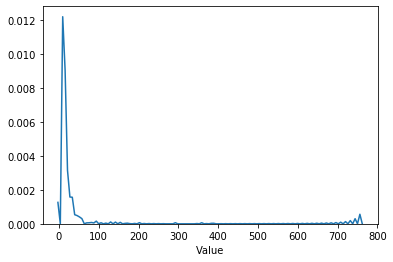

In [43]:
_ = sns.distplot(abs(df_useful["Consumer price indices"]["Value"]), rug=False, hist=False)

In [44]:
#looking at the cases where food prices increased over 100% during one year
df_useful["Consumer price indices"].loc[df_useful["Consumer price indices"]["Value"] > 100]

Area  Year       Value
55                                Angola  2001  152.561015
56                                Angola  2002  108.897433
851     Democratic Republic of the Congo  2001  359.936605
1280                              Guinea  2010  292.596028
2636               Sao Tome and Principe  2014  759.321212
2801                     Solomon Islands  2012  203.559117
2833                         South Sudan  2016  386.378414
2834                         South Sudan  2017  130.056890
3283  Venezuela (Bolivarian Republic of)  2015  171.224360
3284  Venezuela (Bolivarian Republic of)  2016  142.586732

It seems that the formula calculating food price inflation is actually correct. These are realistic cases where the price increased by over 100% in the span of a year. 

##### 1.D.a.vi. Removing areas which are not countries <a name="1Davi"></a>

Having a more detailled look at the dataset, we have remarked that the **areas which are real countries** are exactely the ones with an "Area Code" below $5000$ but not in $[261, 269]$.

In [45]:
#remove Area code >= 5000 or in [261, 269] (EU)
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        selection_countries = df_useful[df_name]['Area Code']<261 
        selection_countries = selection_countries | (df_useful[df_name]['Area Code']>269)
        selection_countries = selection_countries & (df_useful[df_name]['Area Code']<5000)
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


Area Code                    Area  Year         Value
449199        207                Suriname  1980   1089.108684
59269          80  Bosnia and Herzegovina  1991   6115.682138
306160        140                  Monaco  2003   3524.794777
468483        176             Timor-Leste  1976           NaN
366050        169                Paraguay  2009  15933.721912

Removing areas which are not countries in Crops Production


Area Code                       Area                          Item  \
656499          73                    Georgia                        Garlic   
569689          60                El Salvador  Cabbages and other brassicas   
1839827        243  Wallis and Futuna Islands                       Cassava   
1694472        222                    Tunisia                          Oats   
79715           10                  Australia                       Quinces   

         Year    Unit   Value  
656499   2013  tonnes  7200.0  
569689   1972  tonnes   310.0  
1839827  2012  tonnes  2000.0  
1694472  1994  tonnes  1300.0  
79715    1992  tonnes    83.0

Removing areas which are not countries in Livestock production


Area Code           Area      Item  Year       Unit       Value
75021         138         Mexico    Cattle  1999       Head  30192536.0
68709         125  Liechtenstein     Mules  1987       Head         NaN
127377        249          Yemen     Asses  1974       Head    740000.0
73639         136     Mauritania  Chickens  1967  1000 Head      2200.0
79238          28        Myanmar     Sheep  1987       Head    304000.0

Removing areas which are not countries in Live animals import quantities


Area Code                 Area      Item  Year  Unit  Value
38623          57              Belarus  Beehives  2005    No    NaN
379860        146  Republic of Moldova     Sheep  2003  Head  330.0
247078        112               Jordan    Camels  1992  Head    0.0
273143        126            Lithuania    Horses  1994  Head  600.0
354770        168     Papua New Guinea      Pigs  1975  Head   52.0

Removing areas which are not countries in Live animals export quantities


Area Code     Area              Item  Year       Unit  Value
23376          11  Austria  Animals live nes  1986       Head    NaN
248235        112   Jordan            Horses  1983       Head  213.0
17800          22    Aruba          Beehives  1975         No    NaN
61203          21   Brazil             Goats  2003       Head    0.0
75605          29  Burundi          Chickens  1989  1000 Head    NaN

Removing areas which are not countries in Food import quantities


Area Code                                Area  \
4107391          73                             Georgia   
10678949        225                United Arab Emirates   
11104597        155                             Vanuatu   
11193750        236  Venezuela (Bolivarian Republic of)   
2342021         128                    China, Macao SAR   

                                    Item  Year    Unit   Value  
4107391   Juice, orange, single strength  2000  tonnes   141.0  
10678949                     Cranberries  1965  tonnes     NaN  
11104597                         Bananas  1993  tonnes     0.0  
11193750              Oil, olive, virgin  2000  tonnes  3260.0  
2342021                 Wool, hair waste  2001  tonnes   157.0

Removing areas which are not countries in Food export quantities


Area Code                  Area                           Item  \
10178380        176           Timor-Leste                     Beans, dry   
2266734          96  China, Hong Kong SAR  Vegetables, preserved, frozen   
4176794          79               Germany                 Oil, sunflower   
6184082         129            Madagascar                Plums and sloes   
5503240         110                 Japan                        Lactose   

          Year    Unit    Value  
10178380  1989  tonnes      NaN  
2266734   1974  tonnes      NaN  
4176794   1994  tonnes  57795.0  
6184082   1990  tonnes      0.0  
5503240   2009  tonnes     38.0

Consumer price indices is already clean


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will explain how we will handle the missing data in previous dataframes for maps.

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

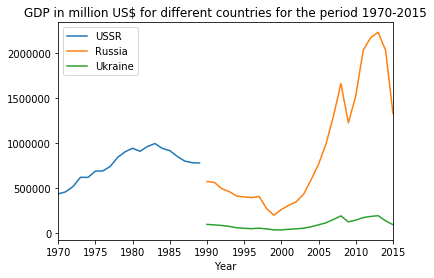

In [46]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

In order to **vizualize folium maps**, we need to **associate each country a value**. The geojson file that we use is not timestamped and **only countries that exist nowadays** are inside it. As **some countries has been dissolved** during the past 50 years, our folium maps won't be complete. For instance, we do not have any value for Ukraine from 1970 to 1989. Our idea to fix this issue is presented in the next paragraph.

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 


Our idea is to **map the former country value to each of the current ones**. For instance in 1982, USSR GDP is around one trillion \\$. Therefore, if we associate (**only for folium map purposes**) this value to each current country that succeeded USSR, **all these countries will appear the same color** in the folium map, i.e. all the USSR area will appear the same color (and the good one).

In order to do so, one need to **identify which countries appeared and disappeared** from the dataset and **at which year**. Then we will use this result along with some **historical research** in our `visualise_world_data_folium` function ([1.E.a.](#1Ea)).

In [47]:
countries_formation_years = {}
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    year_in, year_out = df_useful["GDP"][selection].dropna()["Year"].min(), df_useful["GDP"][selection].dropna()["Year"].max()
    for year in (year_in, year_out):
        if year not in countries_formation_years :
            countries_formation_years[year] = []
    countries_formation_years[year_in].append((country,'+'))
    countries_formation_years[year_out].append((country,'-'))

countries_formation_years.pop(1970)
countries_formation_years.pop(2015)
for year in sorted(list(countries_formation_years)):
    print (year, countries_formation_years[year])

1988 [('Yemen Ar Rp', '-'), ('Yemen Dem', '-')]
1989 [('Czechoslovakia', '-'), ('Ethiopia PDR', '-'), ('USSR', '-'), ('Yemen', '+'), ('Yugoslav SFR', '-')]
1990 [('Armenia', '+'), ('Azerbaijan', '+'), ('Belarus', '+'), ('Bosnia and Herzegovina', '+'), ('Croatia', '+'), ('Czechia', '+'), ('Eritrea', '+'), ('Estonia', '+'), ('Ethiopia', '+'), ('Georgia', '+'), ('Kazakhstan', '+'), ('Kyrgyzstan', '+'), ('Latvia', '+'), ('Lithuania', '+'), ('Montenegro', '+'), ('Republic of Moldova', '+'), ('Russian Federation', '+'), ('Serbia', '+'), ('Slovakia', '+'), ('Slovenia', '+'), ('Tajikistan', '+'), ('The former Yugoslav Republic of Macedonia', '+'), ('Timor-Leste', '+'), ('Turkmenistan', '+'), ('Ukraine', '+'), ('Uzbekistan', '+')]
1999 [('Kosovo', '+')]
2005 [('Curaçao', '+'), ('Sint Maarten (Dutch Part)', '+')]
2007 [('Sudan (former)', '-')]
2008 [('South Sudan', '+'), ('Sudan', '+')]
2012 [('Netherlands Antilles (former)', '-')]


### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with **country names** and **normalizing** the features.

1.  
    5. 
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>
Some countries have **different names in the geojson file and in the dataset**. We first start by correcting them.

In [48]:
# Useful method for name correction
def correct_country_names(old_name, dic):
    if old_name in dic.keys() :
        return dic[old_name]
    return old_name

In [49]:
# Declaring dictionary with name correction
dic = {'Czechia': "Czech Republic",
       'Russian Federation':'Russia',
       "Serbia":"Republic of Serbia",
       'The former Yugoslav Republic of Macedonia':'Macedonia',
       'China, mainland':'China',
       'Viet Nam':'Vietnam',
       'Venezuela (Bolivarian Republic of)':'Venezuela',
       'Iran (Islamic Republic of)':'Iran',
       'Syrian Arab Republic':"Syria",
       'Bolivia (Plurinational State of)': 'Bolivia',
       "Côte d'Ivoire": "Ivory Coast",
       'Congo':"Republic of the Congo",
       "Lao People's Democratic Republic":'Laos',
       "Democratic People's Republic of Korea":"North Korea",
       'Republic of Korea':"South Korea",
       'USSR':['Armenia',
               'Azerbaijan',
               'Belarus',
               'Estonia',
               'Georgia',
               'Kazakhstan',
               'Kyrgyzstan',
               'Latvia',
               'Lithuania',
               'Montenegro',
               'Republic of Moldova',
               'Russia',
               'Republic of Serbia',
               'Timor-Leste',
               'Turkmenistan',
               'Ukraine',
               'Uzbekistan'],
       'Ethiopia PDR':['Eritrea','Ethiopia'],
       'Yugoslav SFR':['Kosovo', 'Slovenia', 'Croatia','Macedonia', 'Bosnia and Herzegovina'],
       'Yemen Dem':['Yemen'],
       'Czechoslovakia':["Czech Republic", 'Slovakia'],
       'Netherlands Antilles (former)':['Curaçao', 'Sint Maarten (Dutch Part)'],
       'Sudan (former)':['South Sudan', 'Sudan']}

# Correcting each DataFrame
for df_name in df_useful :
    print (df_name)
    df_useful[df_name]["Area"] = df_useful[df_name]["Area"].apply(lambda x : correct_country_names(x,dic))
    df_useful[df_name]=df_useful[df_name].explode('Area')

GDP
Crops Production
Livestock production
Live animals import quantities
Live animals export quantities
Food import quantities
Food export quantities
Consumer price indices


Then, we do a function that takes as input **a dataframe and a year** and produces the **corresponding folium map**. This function also h**andles dissolutions of countries** as suggested [before](#1Dbii).

In [50]:
import matplotlib.colors as colors

def visualise_world_data_folium(df, to_visualise, year, units="", log=True,log2=False):
    
    if log2:
        log=False
    if log:
        log2=False
        
    # Defining color palette
    color_scale = sns.cubehelix_palette(9, start=.7, rot=-.9)
    
    # importing geojson and transforming to pandas
    geo_data=json.load(open("Scripts/Data/world-countries.json"))
    dics=geo_data['features']
    clean_dics=[]
    for country in dics:
        clean_dics.append({'Country':country['properties']['name'],
                          'geometry':country['geometry']})
    geo_df=pd.DataFrame(clean_dics)
    
    # cropping to df to data of interest
    df_visu=df[df.Year==year][['Area',to_visualise]]

    # Merging with geo data
    df_visu=geo_df.merge(df_visu,how='left',left_on='Country',right_on='Area')
    df_visu=df_visu.dropna()
    
    if log:
        df_visu['to_plot']=df_visu[to_visualise].apply(lambda x : np.log10(x))
        
    def log2_scale(x):
        out=np.sign(x)*np.log10(1+np.abs(x))
        return out
        
    if log2:
        df_visu['to_plot']=df_visu[to_visualise].apply(log2_scale)
    
    # creating bins for color scaling
    ma_value=df_visu['to_plot'].max()
    mi_value=df_visu['to_plot'].min()
    bins=np.linspace(mi_value,ma_value,8)
    
    # creating Json string for folium
    features=[]
    for _,row in df_visu.iterrows():
        color=np.digitize(row['to_plot'],bins)
        val=row[to_visualise]
        feature={
            'type' : 'Feature',
            
            'properties':{'Country':row['Country'],
                          '{}'.format(units): '{:.2E}'.format(val),
                          'color':colors.to_hex(color_scale[color])},
            'geometry':row['geometry']
            }
        features.append(feature)
    
    def style(feature):
        
        if feature['properties'][units]==np.nan:
            opac=0
        else:
            opac=0.8
        return {'fillOpacity':opac,
                   'weight':0.1,
                   'fillColor':feature['properties']['color']}
    geo_data=(folium.GeoJson({'type':'FeatureCollection','features':features},
                             style_function=style,
                             tooltip=folium.features.GeoJsonTooltip(['Country','{}'.format(units)])))
    m=folium.Map()
    geo_data.add_to(m)
    return m

We can know use it to produce some maps. For instance, we plot below the map of GDP for the year 1985 (before dissolution of USSR) and 1995 (after).

In [51]:
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1985,'GDP [Mil USD]' ,True))
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1995,'GDP [Mil USD]' ,True))

#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

Some of our features **seem to be right skewed**. At first glance it seems that they look like power laws.

For instance the distribution of GDP look a bit like a power law:

//anaconda3/envs/ada/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/ada/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


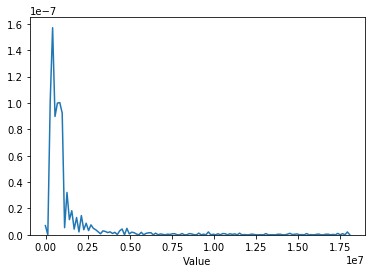

In [52]:
_ = sns.distplot(df_useful["GDP"]["Value"], rug=False, hist=False)

As we later want to train some Machine Learning models, we log those values so that their distribution look a bit **more like a normal distribution**.

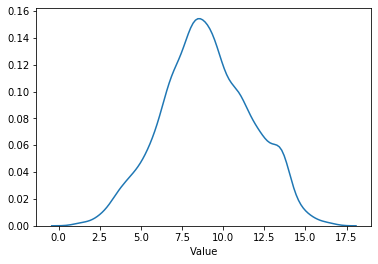

In [53]:
#looks better with log scale
_ = sns.distplot(np.log(df_useful["GDP"]["Value"]), rug=False, hist=False)

The new distribution indeed looks better to train models on it.

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one **uniformized dataframe** `uni_df` with the following columns.


    Country | Year | GDP | Crops production columns | Livestock production columns | Crops importation columns | Livestock importation columns | Crops exportation columns | Livestock exportation columns | CPI
    
In this uniformized dataframe, **a tuple `(Country, Year)` uniquely identifies a row**.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

The current dataframes have several rows for a given `(Country, Year)`. Each of this row correspond to one item. We would like to have a unique row for a given `(Country, Year)` and one column per item:

In [54]:
need_pivot = ['Crops Production',
              'Livestock production',
              'Live animals import quantities',
              'Live animals export quantities',
              'Food import quantities',
              'Food export quantities']

def rename_columns(x, word):
    if x not in ['Area', 'Year', 'ha', 'tonnes', 'hg/ha', 'Head', '1000 Head']:
        return x + ' ' + word
    return x

df_useful['GDP'] = df_useful['GDP'].rename(columns = {'Value':'(GDP, million $)'})[["Area",'Year','(GDP, million $)']]
df_useful['Consumer price indices'] = df_useful['Consumer price indices'].rename(columns = {'Value':'(Consumer price indices, %)'})[["Area",'Year','(Consumer price indices, %)']]

for df_name in need_pivot :
    df_useful[df_name] = pd.pivot_table(df_useful[df_name], index=["Area",'Year'], columns=["Item","Unit"], values="Value").rename(columns=lambda x: rename_columns(x, df_name))
    display(df_name, df_useful[df_name].sample(5))

'Crops Production'

Item                             Anise, badian, fennel, coriander Crops Production  \
Unit                                                                        tonnes   
Area                        Year                                                     
Slovenia                    1968                                            1000.0   
Norway                      1984                                               NaN   
Lithuania                   2011                                            2200.0   
Cyprus                      1968                                              25.0   
United Republic of Tanzania 2011                                            1000.0   

Item                             Apples Crops Production  \
Unit                                              tonnes   
Area                        Year                           
Slovenia                    1968                304000.0   
Norway                      1984                 47564.0   
Lithuania                   2011                 49100.0   
Cyprus                      1968                  8128.0   
United Republic of Tanzania 2011                     NaN   

Item                             Apricots Crops Production  \
Unit                                                tonnes   
Area                        Year                             
Slovenia                    1968                   16100.0   
Norway                      1984                       NaN   
Lithuania                   2011                       NaN   
Cyprus                      1968                    1321.0   
United Republic of Tanzania 2011                       NaN   

Item                             Areca nuts Crops Production  \
Unit                                                  tonnes   
Area                        Year                               
Slovenia                    1968                         NaN   
Norway                      1984                         NaN   
Lithuania                   2011                         NaN   
Cyprus                      1968                         NaN   
United Republic of Tanzania 2011                         NaN   

Item                             Artichokes Crops Production  \
Unit                                                  tonnes   
Area                        Year                               
Slovenia                    1968                         NaN   
Norway                      1984                         NaN   
Lithuania                   2011                       100.0   
Cyprus                      1968                      4369.0   
United Republic of Tanzania 2011                         NaN   

Item                             Asparagus Crops Production  \
Unit                                                 tonnes   
Area                        Year                              
Slovenia                    1968                        NaN   
Norway                      1984                        NaN   
Lithuania                   2011                      500.0   
Cyprus                      1968                        NaN   
United Republic of Tanzania 2011                        NaN   

Item                             Avocados Crops Production  \
Unit                                                tonnes   
Area                        Year                             
Slovenia                    1968                       NaN   
Norway                      1984                       NaN   
Lithuania                   2011                       NaN   
Cyprus                      1968                      50.0   
United Republic of Tanzania 2011                       NaN   

Item                             Bambara beans Crops Production  \
Unit                                                     tonnes   
Area                        Year                                  
Slovenia                    1968                            NaN   
Norway                      1984     

'Livestock production'

Item                             Animals live nes Livestock production  \
Unit                                                              Head   
Area                        Year                                         
Honduras                    2004                                   NaN   
Fiji                        1989                                   NaN   
Netherlands                 2012                                   NaN   
United Republic of Tanzania 1983                                   NaN   
South Sudan                 1968                                   NaN   

Item                             Asses Livestock production  \
Unit                                                   Head   
Area                        Year                              
Honduras                    2004                    23000.0   
Fiji                        1989                        NaN   
Netherlands                 2012                        NaN   
United Republic of Tanzania 1983                   167000.0   
South Sudan                 1968                   600000.0   

Item                             Beehives Livestock production  \
Unit                                   No Livestock production   
Area                        Year                                 
Honduras                    2004                       10600.0   
Fiji                        1989                           NaN   
Netherlands                 2012                           NaN   
United Republic of Tanzania 1983                     1100000.0   
South Sudan                 1968                       60000.0   

Item                             Buffaloes Livestock production  \
Unit                                                       Head   
Area                        Year                                  
Honduras                    2004                            NaN   
Fiji                        1989                            NaN   
Netherlands                 2012                            NaN   
United Republic of Tanzania 1983                            NaN   
South Sudan                 1968                            NaN   

Item                             Camelids, other Livestock production  \
Unit                                                             Head   
Area                        Year                                        
Honduras                    2004                                  NaN   
Fiji                        1989                                  NaN   
Netherlands                 2012                                  NaN   
United Republic of Tanzania 1983                                  NaN   
South Sudan                 1968                                  NaN   

Item                             Camels Livestock production  \
Unit                                                    Head   
Area                        Year                               
Honduras                    2004                         NaN   
Fiji                        1989                         NaN   
Netherlands                 2012                         NaN   
United Republic of Tanzania 1983                         NaN   
South Sudan                 1968                   2662000.0   

Item                             Cattle Livestock production  \
Unit                                                    Head   
Area                        Year                               
Honduras                    2004                   2451310.0   
Fiji                        1989                    268000.0   
Netherlands                 2012                   3879250.0   
United Republic of Tanzania 1983                  13480367.0   
South Sudan                 1968                  12115000.0   

Item                             Cattle and Buffaloes Livestock production  \
Unit                                                                  Head   
Area                        Year                                     

'Live animals import quantities'

Item                             Animals live nes Live animals import quantities  \
Unit                                                                        Head   
Area                        Year                                                   
Timor-Leste                 1989                                             NaN   
Aruba                       1974                                             NaN   
Bosnia and Herzegovina      1973                                             NaN   
Switzerland                 1978                                             NaN   
United Republic of Tanzania 1967                                             0.0   

Item                             Asses Live animals import quantities  \
Unit                                                             Head   
Area                        Year                                        
Timor-Leste                 1989                                  NaN   
Aruba                       1974                                  NaN   
Bosnia and Herzegovina      1973                                  NaN   
Switzerland                 1978                                 42.0   
United Republic of Tanzania 1967                                  0.0   

Item                             Beehives Live animals import quantities  \
Unit                                   No Live animals import quantities   
Area                        Year                                           
Timor-Leste                 1989                                     NaN   
Aruba                       1974                                     NaN   
Bosnia and Herzegovina      1973                                     NaN   
Switzerland                 1978                                     0.0   
United Republic of Tanzania 1967                                     NaN   

Item                             Bovine, Animals Live animals import quantities  \
Unit                                                                       Head   
Area                        Year                                                  
Timor-Leste                 1989                                        65175.0   
Aruba                       1974                                            NaN   
Bosnia and Herzegovina      1973                                         2518.0   
Switzerland                 1978                                         6351.0   
United Republic of Tanzania 1967                                            0.0   

Item                             Buffaloes Live animals import quantities  \
Unit                                                                 Head   
Area                        Year                                            
Timor-Leste                 1989                                      NaN   
Aruba                       1974                                      NaN   
Bosnia and Herzegovina      1973                                      NaN   
Switzerland                 1978                                      NaN   
United Republic of Tanzania 1967                                      NaN   

Item                             Camelids, other Live animals import quantities  \
Unit                                                                       Head   
Area                        Year                                                  
Timor-Leste                 1989                                            NaN   
Aruba                       1974                                            NaN   
Bosnia and Herzegovina      1973                                            NaN   
Switzerland                 1978                                            NaN   
United Republic of Tanzania 1967                                            NaN   

Item                             Camels Live animals import quantities  \
Unit                                                              Head   
Area                        Year      

'Live animals export quantities'

Item            Animals live nes Live animals export quantities  \
Unit                                                       Head   
Area       Year                                                   
Qatar      1993                                             NaN   
Kyrgyzstan 1979                                             NaN   
Lebanon    1986                                             NaN   
Guatemala  1995                                             NaN   
Bolivia    1973                                             NaN   

Item            Asses Live animals export quantities  \
Unit                                            Head   
Area       Year                                        
Qatar      1993                                  NaN   
Kyrgyzstan 1979                                  NaN   
Lebanon    1986                                  0.0   
Guatemala  1995                                 36.0   
Bolivia    1973                                  NaN   

Item            Beehives Live animals export quantities  \
Unit                  No Live animals export quantities   
Area       Year                                           
Qatar      1993                                     NaN   
Kyrgyzstan 1979                                     NaN   
Lebanon    1986                                     NaN   
Guatemala  1995                                     NaN   
Bolivia    1973                                     NaN   

Item            Bovine, Animals Live animals export quantities  \
Unit                                                      Head   
Area       Year                                                  
Qatar      1993                                            0.0   
Kyrgyzstan 1979                                            NaN   
Lebanon    1986                                            0.0   
Guatemala  1995                                          201.0   
Bolivia    1973                                        65440.0   

Item            Buffaloes Live animals export quantities  \
Unit                                                Head   
Area       Year                                            
Qatar      1993                                      NaN   
Kyrgyzstan 1979                                      NaN   
Lebanon    1986                                      NaN   
Guatemala  1995                                      NaN   
Bolivia    1973                                      NaN   

Item            Camelids, other Live animals export quantities  \
Unit                                                      Head   
Area       Year                                                  
Qatar      1993                                            NaN   
Kyrgyzstan 1979                                            NaN   
Lebanon    1986                                            NaN   
Guatemala  1995                                            NaN   
Bolivia    1973                                            NaN   

Item            Camels Live animals export quantities  \
Unit                                             Head   
Area       Year                                         
Qatar      1993                                  24.0   
Kyrgyzstan 1979                                   NaN   
Lebanon    1986                                   NaN   
Guatemala  1995                                   NaN   
Bolivia    1973                                   NaN   

Item            Cattle Live animals export quantities  \
Unit                                             Head   
Area       Year                                         
Qatar      1993                                   0.0   
Kyrgyzstan 1979                                   NaN   
Lebanon    1986                                   0.0   
Guatemala  1995                                 201.0   
Bolivia    1973                               65440.0   

Item            Chickens Live animals export quantities  \
Unit                         

'Food import quantities'

Item                        Alfalfa meal and pellets Food import quantities  \
Unit                                                                 tonnes   
Area                   Year                                                   
British Virgin Islands 2006                                             NaN   
Italy                  1961                                             0.0   
Libya                  1969                                             NaN   
China, Macao SAR       2003                                             0.0   
China                  1986                                             0.0   

Item                        Almonds shelled Food import quantities  \
Unit                                                        tonnes   
Area                   Year                                          
British Virgin Islands 2006                                    NaN   
Italy                  1961                                  176.0   
Libya                  1969                                    NaN   
China, Macao SAR       2003                                   82.0   
China                  1986                                   19.5   

Item                        Animal Oil+Fat+Grs Food import quantities  \
Unit                                                           tonnes   
Area                   Year                                             
British Virgin Islands 2006                                       NaN   
Italy                  1961                                  118533.0   
Libya                  1969                                       7.0   
China, Macao SAR       2003                                       1.0   
China                  1986                                   60203.0   

Item                        Animal Vegetable Oil Food import quantities  \
Unit                                                             tonnes   
Area                   Year                                               
British Virgin Islands 2006                                         2.0   
Italy                  1961                                    319448.0   
Libya                  1969                                      5305.0   
China, Macao SAR       2003                                      7611.0   
China                  1986                                    532046.0   

Item                        Animal fats Food import quantities  \
Unit                                                    tonnes   
Area                   Year                                      
British Virgin Islands 2006                                NaN   
Italy                  1961                           118533.0   
Libya                  1969                                7.0   
China, Macao SAR       2003                                1.0   
China                  1986                            60203.0   

Item                        Anise, badian, fennel, coriander Food import quantities  \
Unit                                                                         tonnes   
Area                   Year                                                           
British Virgin Islands 2006                                                NaN        
Italy                  1961                                              572.0        
Libya                  1969                                              556.0        
China, Macao SAR       2003                                                0.0        
China                  1986                                             1257.0        

Item                        Apples Food import quantities  \
Unit                                               tonnes   
Area                   Year                                 
British Virgin Islands 2006                           NaN   
Italy                  1961                           3.0   
Libya                  1969                        9605.0   
China, Macao SAR       2003 

'Food export quantities'

Item                       Alfalfa meal and pellets Food export quantities  \
Unit                                                                tonnes   
Area                  Year                                                   
Germany               2012                                          2366.0   
Switzerland           2000                                             0.0   
Saint Kitts and Nevis 1991                                             NaN   
Denmark               1978                                             0.0   
Vanuatu               1975                                             NaN   

Item                       Almonds shelled Food export quantities  \
Unit                                                       tonnes   
Area                  Year                                          
Germany               2012                                11153.0   
Switzerland           2000                                   56.0   
Saint Kitts and Nevis 1991                                    NaN   
Denmark               1978                                   12.0   
Vanuatu               1975                                    NaN   

Item                       Animal Oil+Fat+Grs Food export quantities  \
Unit                                                          tonnes   
Area                  Year                                             
Germany               2012                                  344575.0   
Switzerland           2000                                      59.0   
Saint Kitts and Nevis 1991                                       NaN   
Denmark               1978                                   19596.0   
Vanuatu               1975                                       0.0   

Item                       Animal Vegetable Oil Food export quantities  \
Unit                                                            tonnes   
Area                  Year                                               
Germany               2012                                   2773172.0   
Switzerland           2000                                     28793.0   
Saint Kitts and Nevis 1991                                         NaN   
Denmark               1978                                     88295.0   
Vanuatu               1975                                         0.0   

Item                       Animal fats Food export quantities  \
Unit                                                   tonnes   
Area                  Year                                      
Germany               2012                           344575.0   
Switzerland           2000                               59.0   
Saint Kitts and Nevis 1991                                NaN   
Denmark               1978                            19596.0   
Vanuatu               1975                                0.0   

Item                       Anise, badian, fennel, coriander Food export quantities  \
Unit                                                                        tonnes   
Area                  Year                                                           
Germany               2012                                             3174.0        
Switzerland           2000                                               15.0        
Saint Kitts and Nevis 1991                                                NaN        
Denmark               1978                                              373.0        
Vanuatu               1975                                                NaN        

Item                       Apples Food export quantities  \
Unit                                              tonnes   
Area                  Year                                 
Germany               2012                      136310.0   
Switzerland           2000                         828.0   
Saint Kitts and Nevis 1991                           NaN   
Denmark               1978                       26603.0   
Vanuatu               

Some **Nan values** have appeared. After some analysis, we have conclude to replace those Nan values by zeros. Indeed, it seems that those Nan values means that the value were very low and not significant to be measured.

In [55]:
# Deal with the NaN that appeared
for df_name in df_useful :
    if df_name != "GDP":
        for column in list(df_useful[df_name]):
            if column not in ['Area', 'Year']:
                df_useful[df_name][column].fillna(0, inplace=True)

In [56]:
#removing the multiindex, so that merge is clean with GDP and CPI
for df_name in need_pivot :
    df_useful[df_name].columns = [' '.join([str(_) for _ in v]) for v in df_useful[df_name].columns.values]
    display(df_useful[df_name].sample(5))
    

Anise, badian, fennel, coriander Crops Production tonnes  \
Area                      Year                                                             
Germany                   1996                                                0.0          
Angola                    1997                                                0.0          
Botswana                  2011                                                0.0          
Western Sahara            2003                                                0.0          
Wallis and Futuna Islands 1963                                                0.0          

                                Apples Crops Production tonnes  \
Area                      Year                                   
Germany                   1996                        878100.0   
Angola                    1997                             0.0   
Botswana                  2011                             0.0   
Western Sahara            2003                             0.0   
Wallis and Futuna Islands 1963                             0.0   

                                Apricots Crops Production tonnes  \
Area                      Year                                     
Germany                   1996                             300.0   
Angola                    1997                               0.0   
Botswana                  2011                               0.0   
Western Sahara            2003                               0.0   
Wallis and Futuna Islands 1963                               0.0   

                                Areca nuts Crops Production tonnes  \
Area                      Year                                       
Germany                   1996                                 0.0   
Angola                    1997                                 0.0   
Botswana                  2011                                 0.0   
Western Sahara            2003                                 0.0   
Wallis and Futuna Islands 1963                                 0.0   

                                Artichokes Crops Production tonnes  \
Area                      Year                                       
Germany                   1996                                 0.0   
Angola                    1997                                 0.0   
Botswana                  2011                                 0.0   
Western Sahara            2003                                 0.0   
Wallis and Futuna Islands 1963                                 0.0   

                                Asparagus Crops Production tonnes  \
Area                      Year                                      
Germany                   1996                            36711.0   
Angola                    1997                                0.0   
Botswana                  2011                                0.0   
Western Sahara            2003                                0.0   
Wallis and Futuna Islands 1963                                0.0   

                                Avocados Crops Production tonnes  \
Area                      Year                                     
Germany                   1996                               0.0   
Angola                    1997                               0.0   
Botswana                  2011                               0.0   
Western Sahara            2003                               0.0   
Wallis and Futuna Islands 1963                               0.0   

                                Bambara beans Crops Production tonnes  \
Area                      Year                                          
Germany                   1996                                    0.0   
Angola                    1997                                    0.0   
Botswana                  2011                                    0.0   
Western Sahara            2003                                    0.0   
Wallis and Futuna Islands 1963                                    

Animals live nes Livestock production Head  \
Area             Year                                               
Switzerland      1964                                         0.0   
Burundi          1963                                         0.0   
Uruguay          1971                                         0.0   
Papua New Guinea 1995                                         0.0   
Réunion          1983                                         0.0   

                       Asses Livestock production Head  \
Area             Year                                    
Switzerland      1964                            500.0   
Burundi          1963                              0.0   
Uruguay          1971                           1300.0   
Papua New Guinea 1995                              0.0   
Réunion          1983                              5.0   

                       Beehives Livestock production No Livestock production  \
Area             Year                                                          
Switzerland      1964                                           268000.0       
Burundi          1963                                           103000.0       
Uruguay          1971                                            50000.0       
Papua New Guinea 1995                                                0.0       
Réunion          1983                                                0.0       

                       Buffaloes Livestock production Head  \
Area             Year                                        
Switzerland      1964                                  0.0   
Burundi          1963                                  0.0   
Uruguay          1971                                  0.0   
Papua New Guinea 1995                                  0.0   
Réunion          1983                                  0.0   

                       Camelids, other Livestock production Head  \
Area             Year                                              
Switzerland      1964                                        0.0   
Burundi          1963                                        0.0   
Uruguay          1971                                        0.0   
Papua New Guinea 1995                                        0.0   
Réunion          1983                                        0.0   

                       Camels Livestock production Head  \
Area             Year                                     
Switzerland      1964                               0.0   
Burundi          1963                               0.0   
Uruguay          1971                               0.0   
Papua New Guinea 1995                               0.0   
Réunion          1983                               0.0   

                       Cattle Livestock production Head  \
Area             Year                                     
Switzerland      1964                         1698000.0   
Burundi          1963                          458860.0   
Uruguay          1971                         8727000.0   
Papua New Guinea 1995                           90000.0   
Réunion          1983                           19330.0   

                       Cattle and Buffaloes Livestock production Head  \
Area             Year                                                   
Switzerland      1964                                       1698000.0   
Burundi          1963                                        458860.0   
Uruguay          1971                                       8727000.0   
Papua New Guinea 1995                                         90000.0   
Réunion          1983                                         19330.0   

                       Chickens Livestock production 1000 Head  \
Area             Year                                            
Switzerland      1964                                   5800.0   
Burundi          1963                                   1300.0   
Uruguay          1971                                  

Animals live nes Live animals import quantities Head  \
Area                     Year                                                         
United States of America 2004                                                0.0      
Malaysia                 2004                                                0.0      
Central African Republic 1988                                                0.0      
Trinidad and Tobago      1992                                                0.0      
Mexico                   1978                                                0.0      

                               Asses Live animals import quantities Head  \
Area                     Year                                              
United States of America 2004                                     6863.0   
Malaysia                 2004                                        0.0   
Central African Republic 1988                                        0.0   
Trinidad and Tobago      1992                                        0.0   
Mexico                   1978                                        0.0   

                               Beehives Live animals import quantities No Live animals import quantities  \
Area                     Year                                                                              
United States of America 2004                                                0.0                           
Malaysia                 2004                                                0.0                           
Central African Republic 1988                                                0.0                           
Trinidad and Tobago      1992                                                0.0                           
Mexico                   1978                                                0.0                           

                               Bovine, Animals Live animals import quantities Head  \
Area                     Year                                                        
United States of America 2004                                          1373768.0     
Malaysia                 2004                                           148018.0     
Central African Republic 1988                                            16860.0     
Trinidad and Tobago      1992                                              871.0     
Mexico                   1978                                            34267.0     

                               Buffaloes Live animals import quantities Head  \
Area                     Year                                                  
United States of America 2004                                            0.0   
Malaysia                 2004                                         1882.0   
Central African Republic 1988                                            0.0   
Trinidad and Tobago      1992                                            0.0   
Mexico                   1978                                            0.0   

                               Camelids, other Live animals import quantities Head  \
Area                     Year                                                        
United States of America 2004                                                0.0     
Malaysia                 2004                                                0.0     
Central African Republic 1988                                                0.0     
Trinidad and Tobago      1992                                                0.0     
Mexico                   1978                                                0.0     

                               Camels Live animals import quantities Head  \
Area                     Year                                               
United States of America 2004                                         0.0   
Malaysia                 2004                                         0.0   
Central African Republic 1988                           

Animals live nes Live animals export quantities Head  \
Area                     Year                                                         
Central African Republic 1992                                                0.0      
Mexico                   1999                                                0.0      
British Virgin Islands   2005                                                0.0      
Belarus                  1964                                                0.0      
Mauritania               1980                                                0.0      

                               Asses Live animals export quantities Head  \
Area                     Year                                              
Central African Republic 1992                                        0.0   
Mexico                   1999                                        0.0   
British Virgin Islands   2005                                        0.0   
Belarus                  1964                                        0.0   
Mauritania               1980                                        0.0   

                               Beehives Live animals export quantities No Live animals export quantities  \
Area                     Year                                                                              
Central African Republic 1992                                                0.0                           
Mexico                   1999                                                0.0                           
British Virgin Islands   2005                                                0.0                           
Belarus                  1964                                                0.0                           
Mauritania               1980                                                0.0                           

                               Bovine, Animals Live animals export quantities Head  \
Area                     Year                                                        
Central African Republic 1992                                            55000.0     
Mexico                   1999                                           959928.0     
British Virgin Islands   2005                                                0.0     
Belarus                  1964                                                0.0     
Mauritania               1980                                            90000.0     

                               Buffaloes Live animals export quantities Head  \
Area                     Year                                                  
Central African Republic 1992                                            0.0   
Mexico                   1999                                            0.0   
British Virgin Islands   2005                                            0.0   
Belarus                  1964                                            0.0   
Mauritania               1980                                            0.0   

                               Camelids, other Live animals export quantities Head  \
Area                     Year                                                        
Central African Republic 1992                                                0.0     
Mexico                   1999                                                0.0     
British Virgin Islands   2005                                                0.0     
Belarus                  1964                                                0.0     
Mauritania               1980                                                0.0     

                               Camels Live animals export quantities Head  \
Area                     Year                                               
Central African Republic 1992                                         0.0   
Mexico                   1999                                         0.0   
British Virgin Islands   2005                           

Alfalfa meal and pellets Food import quantities tonnes  \
Area    Year                                                           
Israel  2003                                                0.0        
Austria 1983                                            13548.0        
Guyana  1979                                                0.0        
China   1995                                            69496.5        
Burundi 1966                                                0.0        

              Almonds shelled Food import quantities tonnes  \
Area    Year                                                  
Israel  2003                                         2896.0   
Austria 1983                                         1712.0   
Guyana  1979                                            0.0   
China   1995                                         2771.0   
Burundi 1966                                            0.0   

              Animal Oil+Fat+Grs Food import quantities tonnes  \
Area    Year                                                     
Israel  2003                                            2398.0   
Austria 1983                                             788.0   
Guyana  1979                                            1474.0   
China   1995                                          262984.0   
Burundi 1966                                             399.0   

              Animal Vegetable Oil Food import quantities tonnes  \
Area    Year                                                       
Israel  2003                                           131056.0    
Austria 1983                                           144835.0    
Guyana  1979                                            10545.0    
China   1995                                          4021561.0    
Burundi 1966                                              693.0    

              Animal fats Food import quantities tonnes  \
Area    Year                                              
Israel  2003                                     2398.0   
Austria 1983                                      788.0   
Guyana  1979                                     1474.0   
China   1995                                   262984.0   
Burundi 1966                                      399.0   

              Anise, badian, fennel, coriander Food import quantities tonnes  \
Area    Year                                                                   
Israel  2003                                              401.0                
Austria 1983                                             1456.0                
Guyana  1979                                                0.0                
China   1995                                             1141.0                
Burundi 1966                                                0.0                

              Apples Food import quantities tonnes  \
Area    Year                                         
Israel  2003                                3114.0   
Austria 1983                              125239.0   
Guyana  1979                                   0.0   
China   1995                              125005.5   
Burundi 1966                                   0.0   

              Apricots Food import quantities tonnes  \
Area    Year                                           
Israel  2003                                     0.0   
Austria 1983                                 10265.0   
Guyana  1979                                     0.0   
China   1995                                    57.5   
Burundi 1966                                     0.0   

              Apricots, dry Food import quantities tonnes  \
Area    Year                                                
Israel  2003                                       1923.0   
Austria 1983                                          0.0   
Guyana  1979                                          0.0   
China   1995                                        281.5   
Burundi 1966  

Alfalfa meal and pellets Food export quantities tonnes  \
Area            Year                                                           
Indonesia       2009                                                0.0        
Malta           1995                                                0.0        
Solomon Islands 1976                                                0.0        
Guinea-Bissau   1961                                                0.0        
South Africa    2005                                               40.0        

                      Almonds shelled Food export quantities tonnes  \
Area            Year                                                  
Indonesia       2009                                           11.0   
Malta           1995                                            0.0   
Solomon Islands 1976                                            0.0   
Guinea-Bissau   1961                                            0.0   
South Africa    2005                                            5.0   

                      Animal Oil+Fat+Grs Food export quantities tonnes  \
Area            Year                                                     
Indonesia       2009                                               7.0   
Malta           1995                                               0.0   
Solomon Islands 1976                                               0.0   
Guinea-Bissau   1961                                               0.0   
South Africa    2005                                            1985.0   

                      Animal Vegetable Oil Food export quantities tonnes  \
Area            Year                                                       
Indonesia       2009                                         20004553.0    
Malta           1995                                                0.0    
Solomon Islands 1976                                             3549.0    
Guinea-Bissau   1961                                               43.0    
South Africa    2005                                            27013.0    

                      Animal fats Food export quantities tonnes  \
Area            Year                                              
Indonesia       2009                                        7.0   
Malta           1995                                        0.0   
Solomon Islands 1976                                        0.0   
Guinea-Bissau   1961                                        0.0   
South Africa    2005                                     1985.0   

                      Anise, badian, fennel, coriander Food export quantities tonnes  \
Area            Year                                                                   
Indonesia       2009                                              612.0                
Malta           1995                                               11.0                
Solomon Islands 1976                                                0.0                
Guinea-Bissau   1961                                                0.0                
South Africa    2005                                               21.0                

                      Apples Food export quantities tonnes  \
Area            Year                                         
Indonesia       2009                                  61.0   
Malta           1995                                   0.0   
Solomon Islands 1976                                   0.0   
Guinea-Bissau   1961                                   0.0   
South Africa    2005                              262745.0   

                      Apricots Food export quantities tonnes  \
Area            Year                                           
Indonesia       2009                                   298.0   
Malta           1995                                     0.0   
Solomon Islands 1976                                     0.0   
Guinea-Bissau   1961                                     0.0   
South

#### 1.F.b. Dealing with unit discrepencies  <a name="1Fb"></a>
Before merging dataframes, we notice two different units in the dataframes dealing with livestock datas: "1000 Heads" and "Heads". Let's have a look at the following dataframes:
* Livestock production
* Live animals import quantities
* Live animals export quantities


In [57]:
#Select dfs that correspond to livestock data
livestock_dfs={s:df_useful[s] for s in df_useful.keys() if 'live' in s.lower()}

Before handling the data, we want to know if the columns presented in "1000 Heads" are also presented in "Heads"

In [58]:
# Useful method to remove words from string
def drop_words( s , w=1 , end=True):
    if end:
        return s.rsplit(' ',w)[0]
    else:
        return s.split(' ',w)[-1]
    

for key in livestock_dfs.keys():
    col=livestock_dfs[key].columns
    th_heads=[s for s in col if '1000 head' in s.lower()]
    heads=[s for s in col if '1000 head' not in s.lower()]
    shared=[s for s in th_heads if drop_words(s,2)+" Head" in heads]
    print('There are {} columns expressed in "1000 Heads" and {} columns expressed in "Head" in the dataframe {} and {} columns are expressed in both'
          .format(len(th_heads),len(heads),key,len(shared)))
    

There are 8 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Livestock production and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals import quantities and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals export quantities and 0 columns are expressed in both


In [59]:
def convert_1000H_to_head(df):
    
    # methods converting the columns expressed in "1000 Head" in "Head" and renaming them
    
    cols_to_convert=[col for col in df.columns if '1000 head' in col.lower()]
    df[cols_to_convert]=df[cols_to_convert]*1000
    new_cols=[drop_words(s,2)+' Head' for s in cols_to_convert]
    name_dic={old:new for old,new in zip(cols_to_convert,new_cols)}
    df=df.rename(columns=name_dic)
    return df

In [60]:
for key in livestock_dfs.keys():
    df_useful[key]=convert_1000H_to_head(df_useful[key])
    display(df_useful[key].head(1))

Animals live nes Livestock production Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Asses Livestock production Head  \
Area        Year                                    
Afghanistan 1961                        1300000.0   

                  Beehives Livestock production No Livestock production  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Buffaloes Livestock production Head  \
Area        Year                                        
Afghanistan 1961                                  0.0   

                  Camelids, other Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Camels Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          250000.0   

                  Cattle Livestock production Head  \
Area        Year                                     
Afghanistan 1961                         2900000.0   

                  Cattle and Buffaloes Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                       2900000.0   

                  Chickens Livestock production Head  \
Area        Year                                       
Afghanistan 1961                           4700000.0   

                  Ducks Livestock production Head  ...  \
Area        Year                                   ...   
Afghanistan 1961                              0.0  ...   

                  Horses Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          276841.0   

                  Mules Livestock production Head  \
Area        Year                                    
Afghanistan 1961                          20000.0   

                  Pigeons, other birds Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                             0.0   

                  Pigs Livestock production Head  \
Area        Year                                   
Afghanistan 1961                             0.0   

                  Poultry Birds Livestock production Head  \
Area        Year                                            
Afghanistan 1961                                4700000.0   

                  Rabbits and hares Livestock production Head  \
Area        Year                                                
Afghanistan 1961                                          0.0   

                  Rodents, other Livestock production Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Sheep Livestock production Head  \
Area        Year                                    
Afghanistan 1961                       18000000.0   

                  Sheep and Goats Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                 22200000.0   

                  Turkeys Livestock production Head  
Area        Year                                     
Afghanistan 1961                                0.0  

[1 rows x 22 columns]

Animals live nes Live animals import quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals import quantities No Live animals import quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals import quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals import quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals import quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals import quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals import quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals import quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals import quantiti

Animals live nes Live animals export quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals export quantities No Live animals export quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals export quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals export quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals export quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals export quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals export quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals export quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals export quantiti

#### 1.F.c. Merging everything  <a name="1Fc"></a>
We are now creating the uniformized dataframe `uni_df`. Each row corresponds to one tuple `(Country, Year)` so that we can later **group by country** or **year**. In addition to the country ("Area") and the "Year", the columns will either be an **economic feature ("GDP", "CPI")** or an **agricultural one (some crop harvested area, some livestock export quantity, ...)**. With this uniformized dataframe, we can later on **analyze correlations and links** between different feautures place and yearwise. This means we can measure a correlation of e.g. GDP with the production of a specific crop over all countries and all years.

In [61]:
uni_df = df_useful['GDP'].dropna()
for df_name in need_pivot :
    uni_df = pd.merge(uni_df, df_useful[df_name], how='left', on=['Area', 'Year'])
uni_df = pd.merge(uni_df,df_useful['Consumer price indices'], how='left', on=['Area', 'Year'])

# Deal with the NaN that appeared
for column in list(uni_df):
    if column not in ['Area', 'Year']:
        uni_df[column].fillna(0, inplace=True)
uni_df.sample(30)

Area  Year  (GDP, million $)  \
6442                   Palau  2000      1.461316e+02   
5542              Montserrat  1984      4.171010e+01   
6395                Pakistan  1999      7.777956e+04   
2198                 Croatia  2009      6.263610e+04   
2629      Dominican Republic  1984      1.295970e+04   
803                  Belgium  2005      3.873564e+05   
3071                  France  1986      7.745740e+05   
1571                  Canada  2011      1.788647e+06   
8671                  Tuvalu  1995      1.176250e+01   
634                  Bahrain  2000      9.062907e+03   
4076                 Ireland  1999      9.877869e+04   
4279                  Jordan  1972      7.046977e+02   
7423                 Senegal  2009      1.277762e+04   
5064                Maldives  1992      3.687508e+02   
7137             Saint Lucia  1999      7.736523e+02   
9646               Macedonia  1986      7.937065e+04   
2139             Ivory Coast  1976      4.661874e+03   
1027                 Bolivia  1999      8.285064e+03   
4809           Liechtenstein  1993      1.869309e+03   
1748                   Chile  2004      9.933327e+04   
3111        French Polynesia  1980      1.558181e+03   
6648             Philippines  1976      1.894385e+04   
926                  Bermuda  1990      2.034952e+03   
2876                 Estonia  1995      4.422724e+03   
9632  Bosnia and Herzegovina  1983      6.439285e+04   
6825             Puerto Rico  2015      1.029060e+05   
4276                   Japan  2015      4.383076e+06   
4701                 Liberia  1977      5.895494e+02   
4564                    Laos  2004      2.376062e+03   
3610           Guinea-Bissau  1993      7.170683e+02   

      Anise, badian, fennel, coriander Crops Production tonnes  \
6442                                                0.0          
5542                                                0.0          
6395                                                0.0          
2198                                                0.0          
2629                                                0.0          
803                                                 0.0          
3071                                                0.0          
1571                                            10740.0          
8671                                                0.0          
634                                                 0.0          
4076                                                0.0          
4279                                                0.0          
7423                                                0.0          
5064                                                0.0          
7137                                                0.0          
9646                                             1500.0          
2139                                                0.0          
1027                                                0.0          
4809                                                0.0          
1748                                                0.0          
3111                                                0.0          
6648                                                0.0          
926                                                 0.0          
2876                                                0.0          
9632                                             1400.0          
6825                                                0.0          
4276                                                0.0          
4701                                                0.0          
4564                                                0.0          
3610                                                0.0          

      Apples Crops Production tonnes  Apricots Crops Production tonnes  \
6442                             0.0                               0.0   
5542                             0.0                               0.0   
6395              

#### 1.G The last filter  <a name="1G"></a>

At the very beginning, when importing data for the crops production, we focused on the "food crops". It is very likely that the import and export dataframes contain more data than we have in the production dataframe. As we want, later, compare these data, we decide to keep only the crops and animals for which we have production,import and export data.  

Let's have a look!

In [62]:
import_cols=[col for col in uni_df.columns if 'import' in col.lower()]
export_cols=[col for col in uni_df.columns if 'export' in col.lower()]
prod_cols=[col for col in uni_df.columns if 'production' in col.lower()]
others=[col for col in uni_df.columns if 'production' not in col.lower() and 'export' not in col.lower() and 'import' not in col.lower()]
print('There are {} import columns, {} export columns,{} production columns and {} other.'.format(len(import_cols),len(export_cols),len(prod_cols),len(others)))

There are 472 import columns, 464 export columns,144 production columns and 4 other.


There is indeed much work to be done!

In [63]:
import_col_dic={drop_words(s,3):s for s in import_cols}
export_col_dic={drop_words(s,3):s for s in export_cols}
prod_col_dic={drop_words(s,3):s for s in prod_cols}

import_keys=list(import_col_dic.keys())
export_keys=list(export_col_dic.keys())
prod_keys=list(prod_col_dic.keys())

prod=set([])
imp=set([])
exp=set([])

for prod_feature in prod_keys:
    for imp_feature in import_keys:
        if prod_feature.lower()+" food" == imp_feature.lower() or prod_feature.lower()+" live animals" == imp_feature.lower():
            for exp_feature in export_keys:
                if prod_feature.lower()+" food" == exp_feature.lower() or prod_feature.lower()+" live animals" == exp_feature.lower():
                    prod.add(prod_feature)
                    imp.add(imp_feature)
                    exp.add(exp_feature)
prod=list(prod)
prod.sort()
exp=list(exp)
exp.sort()
imp=list(imp)
imp.sort()

print('We find {} columns present in import, export and production'.format(len(prod)))

import_cols=[import_col_dic[k] for k in imp]
export_cols=[export_col_dic[k] for k in exp]
prod_cols=[prod_col_dic[k] for k in prod]

cols_of_interest=others+import_cols+export_cols+prod_cols

We find 107 columns present in import, export and production


In [64]:
uni_df=uni_df[cols_of_interest]

In [65]:
import pickle
pickle.dump(uni_df,open("Scripts/Data/uni_df.pkl",'wb'))

### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)      
                
    3. [Structure of international trade and historical context](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Consumer price indices](#2B), then study the [structure of international trade and historical context](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)

##### 2.A.a Crops and livestock production and trade <a name="2Aa"></a>
For the next milestone, we will also produce some maps, showing for instance the production of a specific crop per country over the years. We have shown in previous parts that the dataset contains the necessary data and that we can handle the data in its size and plot maps.

##### 2.A.b Introducing the concept of food self-sufficiency <a name="2Ab"></a>
In this section we will present and compute the **notion of food self-sufficiency**. We will use the **quantitative definition of the Food and Agriculture Organization (FAO)**. 
###### 2.A.b.i Basic idea <a name="2Abi"></a>
One may wonder how to know **whether a country produces all the food it needs or not**. The notion of food-self-sufficency allows to answer to this question. More formally, it is a rate that decribes how **to which degree a country can satisfy to meet its internal consumption needs by production**. It describes the extent to which a country is able to **feed its population through its domestic food production**. We are interested in this measure since we think**it could be correlated** with the economic conditions of this country, particularly **price stability**. Price stability is defined in the next part.
###### 2.A.b.ii Formula and computation <a name="2Abii"></a>
In order to compute the food self-sufficiency, we will apply the following **formula** that gives us the **food self-sudfficiency as a percentage** :

$$\frac{Production \times 100}{Production + Imports – Exports}$$

The following is a trial calculation of self-sufficiency. Refining which agriculutral products should go into this calculation still need to be done for next milestone. Indeed with our first calculations it seems that the self-sufficiency is always lower than 100% whereas this should not be the case.

In [66]:
def compute_self_suficiency(df,w=None):
    
    # From the unified dataframe df, compute the self sufficiency score for each year for each country
    # if a paramter of weights is given as a dict, the method returns the aggregated score.
    
    weights=w.copy()
    
    #Useful method to manipulate names
    def drop_words( s , w=1 , end=True):
        if end:
            return s.rsplit(' ',w)[0]
        else:
            return s.split(' ',w)[-1]
    
    df=df.set_index(['Area','Year'])
    
    #Getting the columns corresponding to import, export and production
    import_cols=[col for col in df.columns if 'import' in col.lower()]
    export_cols=[col for col in df.columns if 'export' in col.lower()]
    prod_cols=[col for col in df.columns if 'production' in col.lower()]
    
    #Initializing new dataframe
    scores=pd.DataFrame(index=df.index)
    
    #Generating scores
    for i,col in enumerate(import_cols):
        scores[drop_words(col,3)]=(df[prod_cols[i]]*100/(
                                    df[prod_cols[i]]+df[import_cols[i]]-df[export_cols[i]]))
    
    #If no weights, return scores without aggregate
    if weights==None:
        return scores
    
    features=[w for w in weights.keys()]
    temp=pd.DataFrame(index=df.index)
    
    #replacing na with 0 to avoid na aggregated scores
    scores=scores.fillna(0)
    
    #Selecting features of interest and multiplying them with their weight
    #Note: Some weights refer to the same score (eg 'Maize Crops Production tonnes' and 'Maize Food import quantities tonnes') to go around this problem, the scores referring to the same columns are sumed
    
    temp_dic={}#Will retain data untill complete and then turned into pandas DataFrame
    popped=[] #Will store the weights that are already taken care of because they reffered to the same columns as another weight already treated
    for feat in list(weights.keys()):
        if feat not in popped:
            w_agg={feat:weights[feat]}
            s=re.split(' Food| Live.*| Crops',feat)[0]
            s='^'+s
            w=weights[feat]

            for f in list(weights.keys()):
                if f!=feat and re.search(s,f) and s[1:]==re.split(' Food.*| Live.*| Crops.*',f)[0]:
                    w+=weights[f]
                    w_agg.update({f:weights[f]})
                    popped.append(f)
            cols=[c for c in scores.columns if re.split(' Food.*| Live.*| Crops.*',c)[0]==s[1:]]
            if len(cols)==0:
                print('\n {} NOT FOUND'.format(feat))
            else:
                print('{} weight : {} agg from: {}'.format(feat,w,w_agg))
                temp_df=scores[cols].copy()
                temp_df=temp_df.apply(lambda x: x*w)
                temp_dic.update(temp_df.to_dict())
            
    temp=pd.DataFrame(temp_dic)
    #Aggregating the scores
    scores=pd.DataFrame(temp.sum(axis=1),columns=['Agg'])
    
    return scores

#### 2.B. Consumer price indices  <a name="2B"></a>

2. 
        
    2. 
    
        1. [Definition](#2Ba) 
    
        2. [Usage](#2Bb)      
        
##### 2.B.a. Definition  <a name="2Ba"></a>

**Consumer price indices (CPI)** are a way to measure the **changes of the average price level of goods**.
Typically a "basket of consumer goods and services" is used to calculate average consumer prices each year. Then, the relative change of these prices is used as a **measure of inflation or deflation over a period of time**. More technically, for a given item, the CPI is the ratio of the market basket for two different years. Global CPI is an average of sigle item CPI with **some standardized weights**. 
The FAO dataset includes the consumer prices, food indices. This means we have **information about countries food price stability over the years**.

##### 2.B.b. Usage  <a name="2Bb"></a>

The CPI has **many uses** and is often taken into consideration. For instance it is used for budget and pension revisions, monetary and economic policies, and economic analysis. It is a good indicator of relative price stability, which is essential for development and economic safety. The european central banks main objective is price stability in the euro-zone of keeping the consumer price index below a growth of 2% per year.  

**We will use the CPI** to answer the following questions: "Are prices more stables in more self-sufficient countries ?", "Is there a link between the CPI and other agricultural features ?" 

#### 2.C. Structure of international trade and historical context  <a name="2C"></a>


Our dataset contains data for the historical period **from 1970 to 2015**. In order to be able to correctly interpret the results we are going to see, we first made **a brief historical research** on this period. Listed below are important events of this period for which we think they have had a **significant influence on the agriculture and the economy**.

There was the Cold war from 1945 to 1990 with two economic superpowers (USA and USSR). The USSR had been dissolved in 1991.  The Japanese economic miracle occured from 1945 to 1990 and allowed Japan to come out of the disastrous state in which it was at the exit of the WW2 and become one of the worlds largest economies. There have been 2 big oil crises, in 1973 and 1979. There have been many wars (Middle East wars 1973-2000 e.g. Yom Kippur War 1973, Islamic Revolution in Iran 1979, Iran–Iraq war 1980-1988, Gulf war 1990-1991, Yugoslav wars 1991-2001...). We have **already seen some consequences of such events** by dealing with countries names in a previous section.

The **third Agricultural Revolution** (also known as Green revolution) occurs form 1960 to 1990 and improved agricultural productions thanks to fertilizers and chemicals.

The following public-domain image from [Wikimedia](https://commons.wikimedia.org/wiki/File:Imf-advanced-un-least-developed-2008.svg) represents developed countries (blue), developing ones (orange) and least developed ones (red) according to the United Nations and International Monetary Fund. We expect to see **similar results with our dataset (GDP)**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Imf-advanced-un-least-developed-2008.svg/1920px-Imf-advanced-un-least-developed-2008.svg.png">

The following image, also from [Wikimedia](https://commons.wikimedia.org/wiki/File:Cumulative_Current_Account_Balance.png) shows the **cumulative commercial balance** for the period 1980-2008. We also expect to see similar results with our dataset, but **there might be difference as we focus on agriculture**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Cumulative_Current_Account_Balance.png/800px-Cumulative_Current_Account_Balance.png">


In order to have an idea of the **international trade and economy structure**, we are interested in **GDP**: 

In [67]:
pivoted_GDP_df = uni_df[['Area','Year']]
pivoted_GDP_df["GDP"] = uni_df["(GDP, million $)"]
pivoted_GDP_df = pivoted_GDP_df.pivot_table(index='Year', columns='Area', values="GDP").dropna(axis=1)

//anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
pivoted_GDP_df.sample(5)

Area   Afghanistan       Albania        Algeria      Andorra         Angola  \
Year                                                                          
2002   4285.170218   4355.865889   56819.210891  1733.195719   15285.592487   
1970   1748.886597   2265.577056    5155.120658    99.476787    3806.982157   
2014  21123.486862  13277.963577  213983.063000  3350.599726  145712.177590   
1990   3621.600007   2146.815829   61751.375957  1302.006184   13661.852631   
1981   3478.787916   2215.474766   44264.573122   492.189978    6693.017247   

Area    Anguilla  Antigua and Barbuda      Argentina        Armenia  \
Year                                                                  
2002  157.444444           809.754485  110583.590320    2534.163311   
1970    3.902380            33.865823   33985.054954  433412.461170   
2014  311.344444          1274.330316  570722.906150   11609.513241   
1990   75.601760           459.469059  153185.723200    2305.595682   
1981   13.988466           152.098678   84624.923051  906864.339720   

Area        Aruba  ...  United Republic of Tanzania  United States of America  \
Year               ...                                                          
2002  1941.094724  ...                 14140.007894                10977514.0   
1970   176.630023  ...                  2435.250913                 1075900.0   
2014  2649.720670  ...                 49488.305205                17393103.0   
1990   764.887117  ...                  6999.982958                 5979600.0   
1981   312.733527  ...                 10777.051763                 3210900.0   

Area       Uruguay     Uzbekistan     Vanuatu      Venezuela        Vietnam  \
Year                                                                          
2002  13606.503907    9876.841087  264.219504   92889.443990   35064.105501   
1970   2537.645161  433412.461170   38.009945   13830.145000    2775.103464   
2014  57235.942016   63029.684684  814.933983  363266.237610  186204.652920   
1990   9239.418920   14742.409843  171.483937   47036.422264    6471.744896   
1981  11880.159358  906864.339720  108.054073   77581.928605    1884.649559   

Area         Yemen        Zambia      Zimbabwe  
Year                                            
2002  12247.088236   4193.839169   7111.380000  
1970    153.591228   1544.192383   2022.510406  
2014  34010.572851  27134.904865  14197.000000  
1990   4036.181977   3794.810423  11737.766649  
1981    407.919142   4016.122281   8599.426306  

[5 rows x 209 columns]

As we can see on a subset of the correlation matrix below, GDP are often hugely correlated between countries. 

In [69]:
selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

corr = pivoted_GDP_df[selected_countries].corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation matrix contains lots of values that are very closed to one (red). This is also true for the whole correlation matrix as seen below:

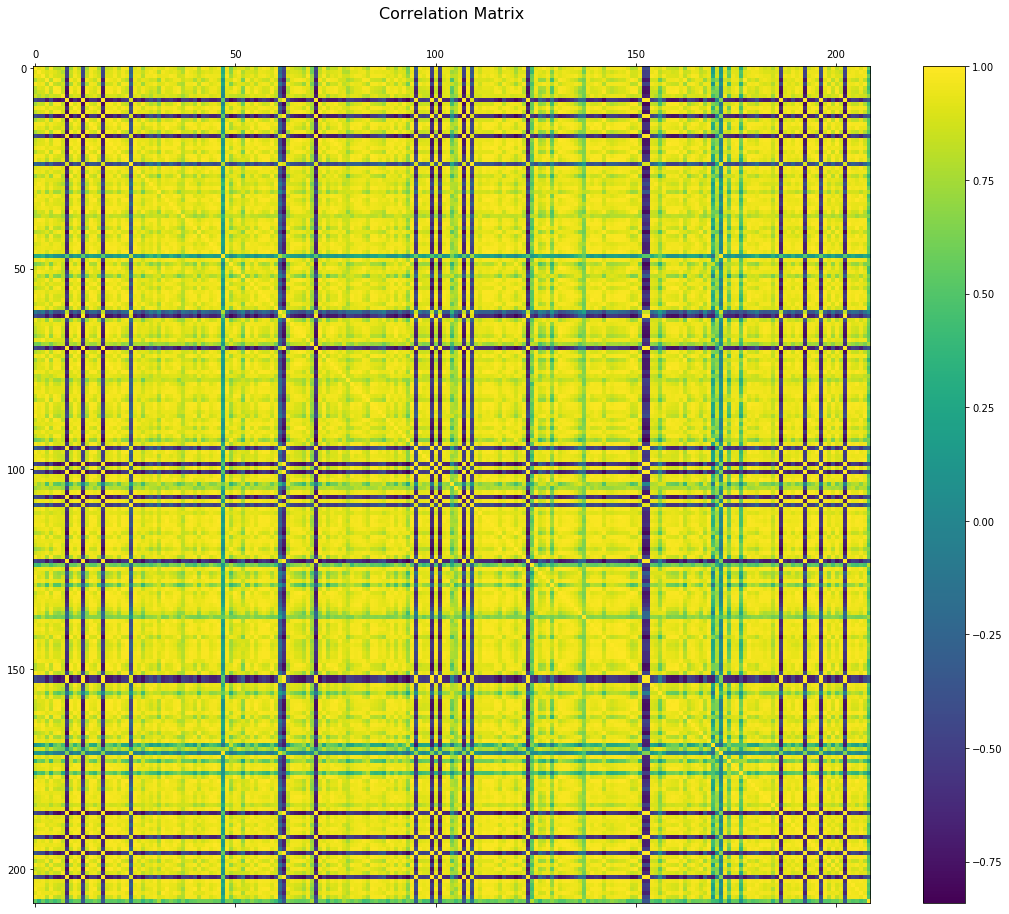

In [70]:
f = plt.figure(figsize=(19, 15))
plt.matshow(pivoted_GDP_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We then try to clusterize this correlation matrix in order to find countries whose GDP are correlated:

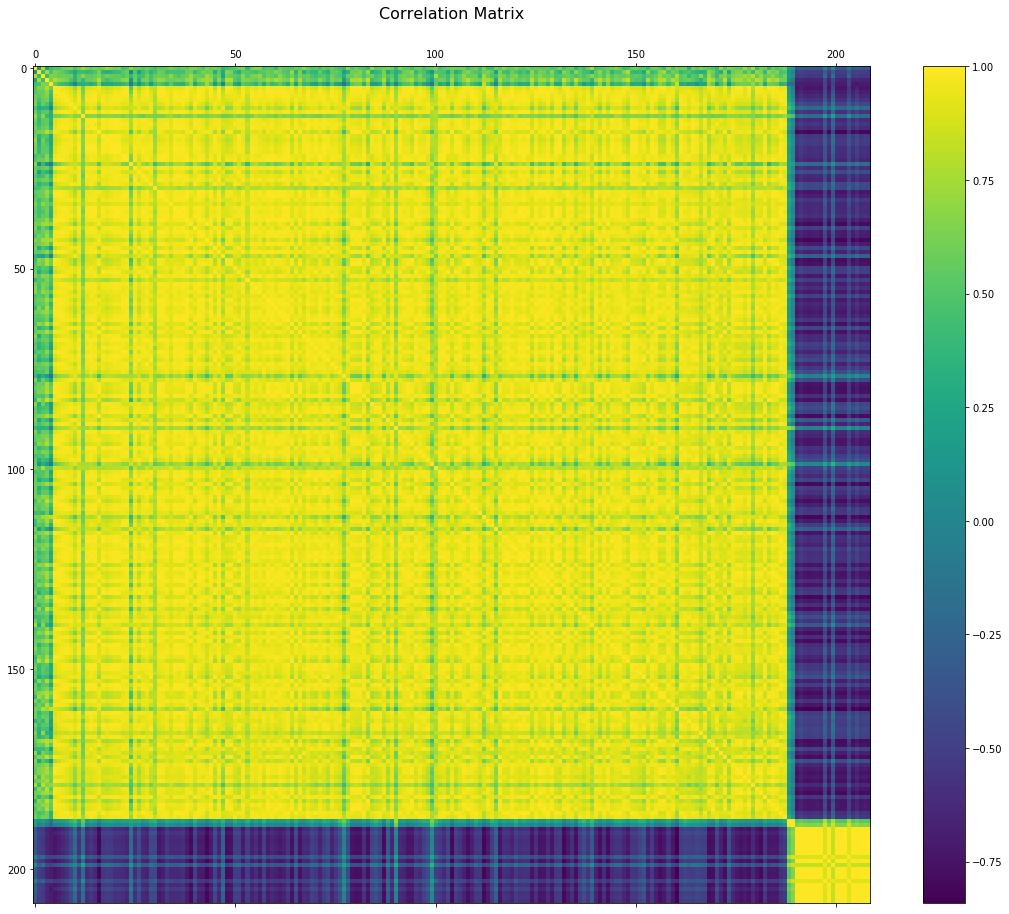

In [71]:
corr = pivoted_GDP_df.corr().values
pdist = spc.distance.pdist(corr)   # vector of ('55' choose 2) pairwise distances
linkage = spc.linkage(pdist, method='complete')
ind = spc.fcluster(linkage, 0.32*pdist.max(), 'distance')
columns = [pivoted_GDP_df.columns.tolist()[i] for i in list((np.argsort(ind)))]
clusterised_df = pivoted_GDP_df.reindex(columns, axis=1)

f = plt.figure(figsize=(19, 15))
plt.matshow(clusterised_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We have found regions in which the GDP is highly correlated and between which the correlation coefficent is lower. We could refine the big clusters by iterating this method.

**Interpretation:** The correlation matrix of GDP contains lots of values that are very closed to one. This means that **GDP in two different countries have a trend to evolve the same way**. Therefore, we can say that the world countries have **strong enough trading relations** to make the GDP evolve the same way. The fact that we have found some **main clusters** could be interpreted as regions in which the **trading relations are more important**.

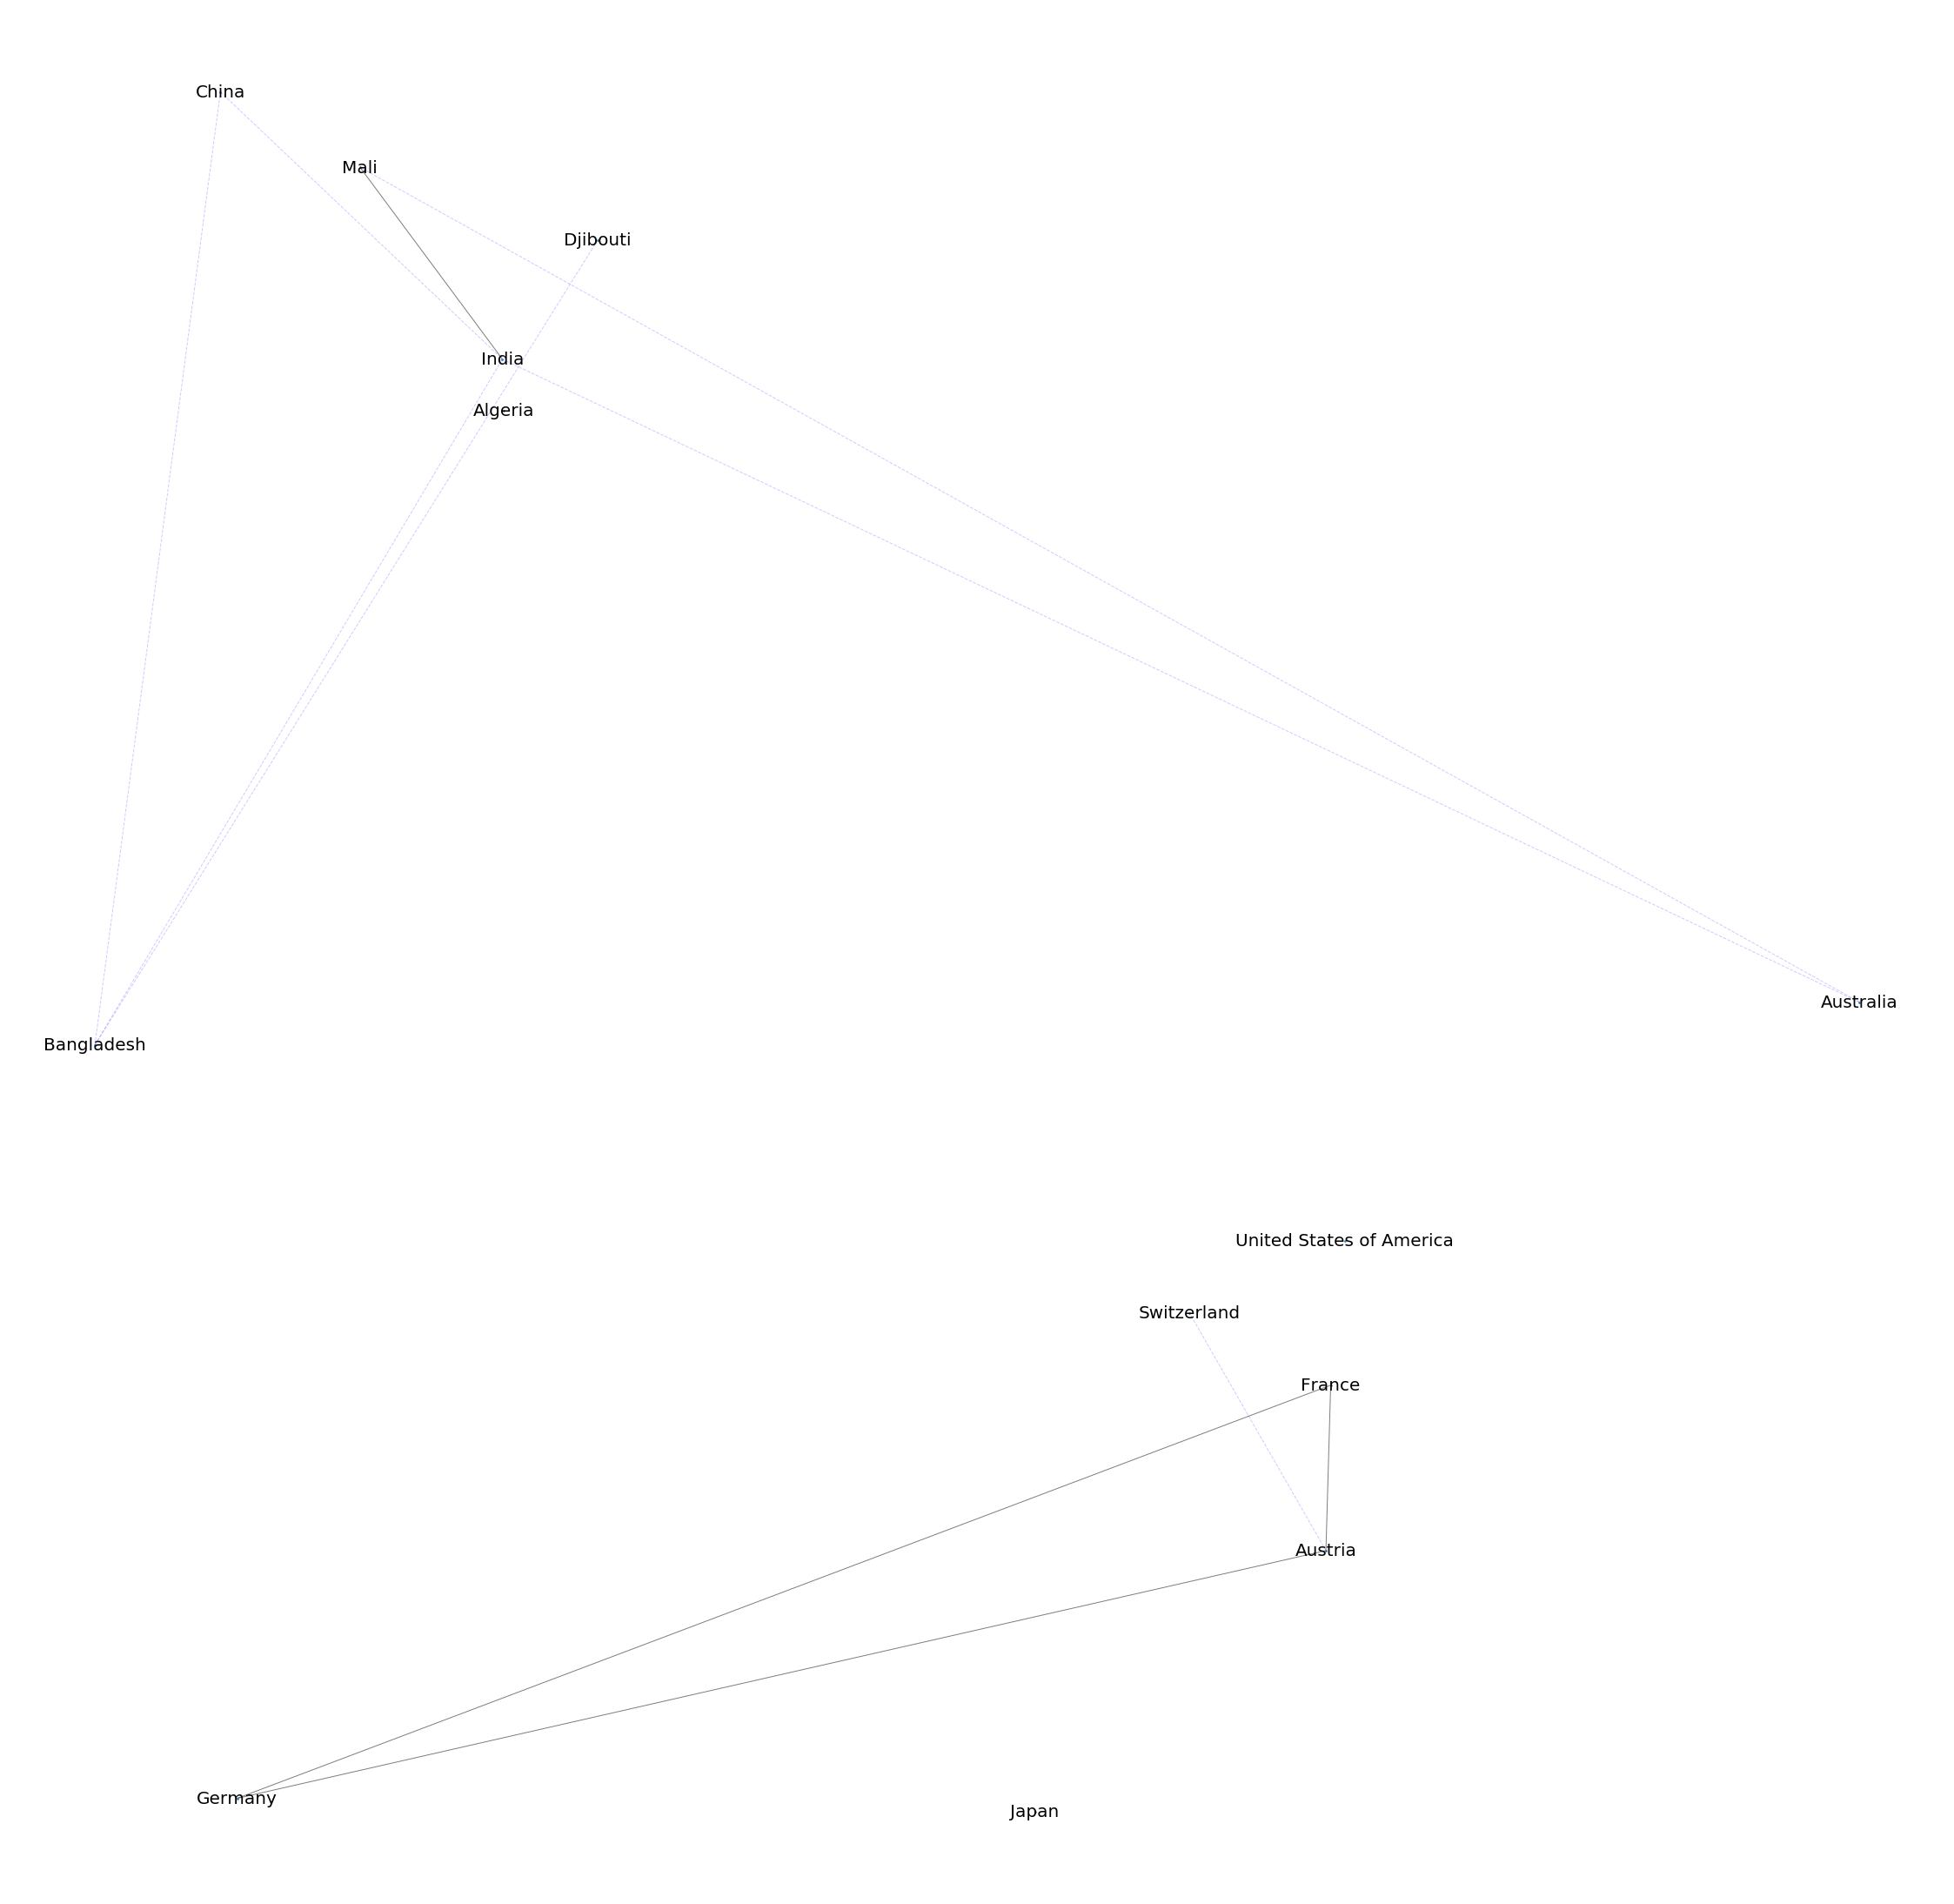

In [72]:
import networkx as nx


plt.figure(figsize=(40,40))

selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

G =  nx.from_pandas_adjacency(pivoted_GDP_df[selected_countries].corr())

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.99]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.98 < d['weight'] <= 0.99]

pos = nx.spring_layout(G, k=0.01185)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_shape='.')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=1, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.2, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()


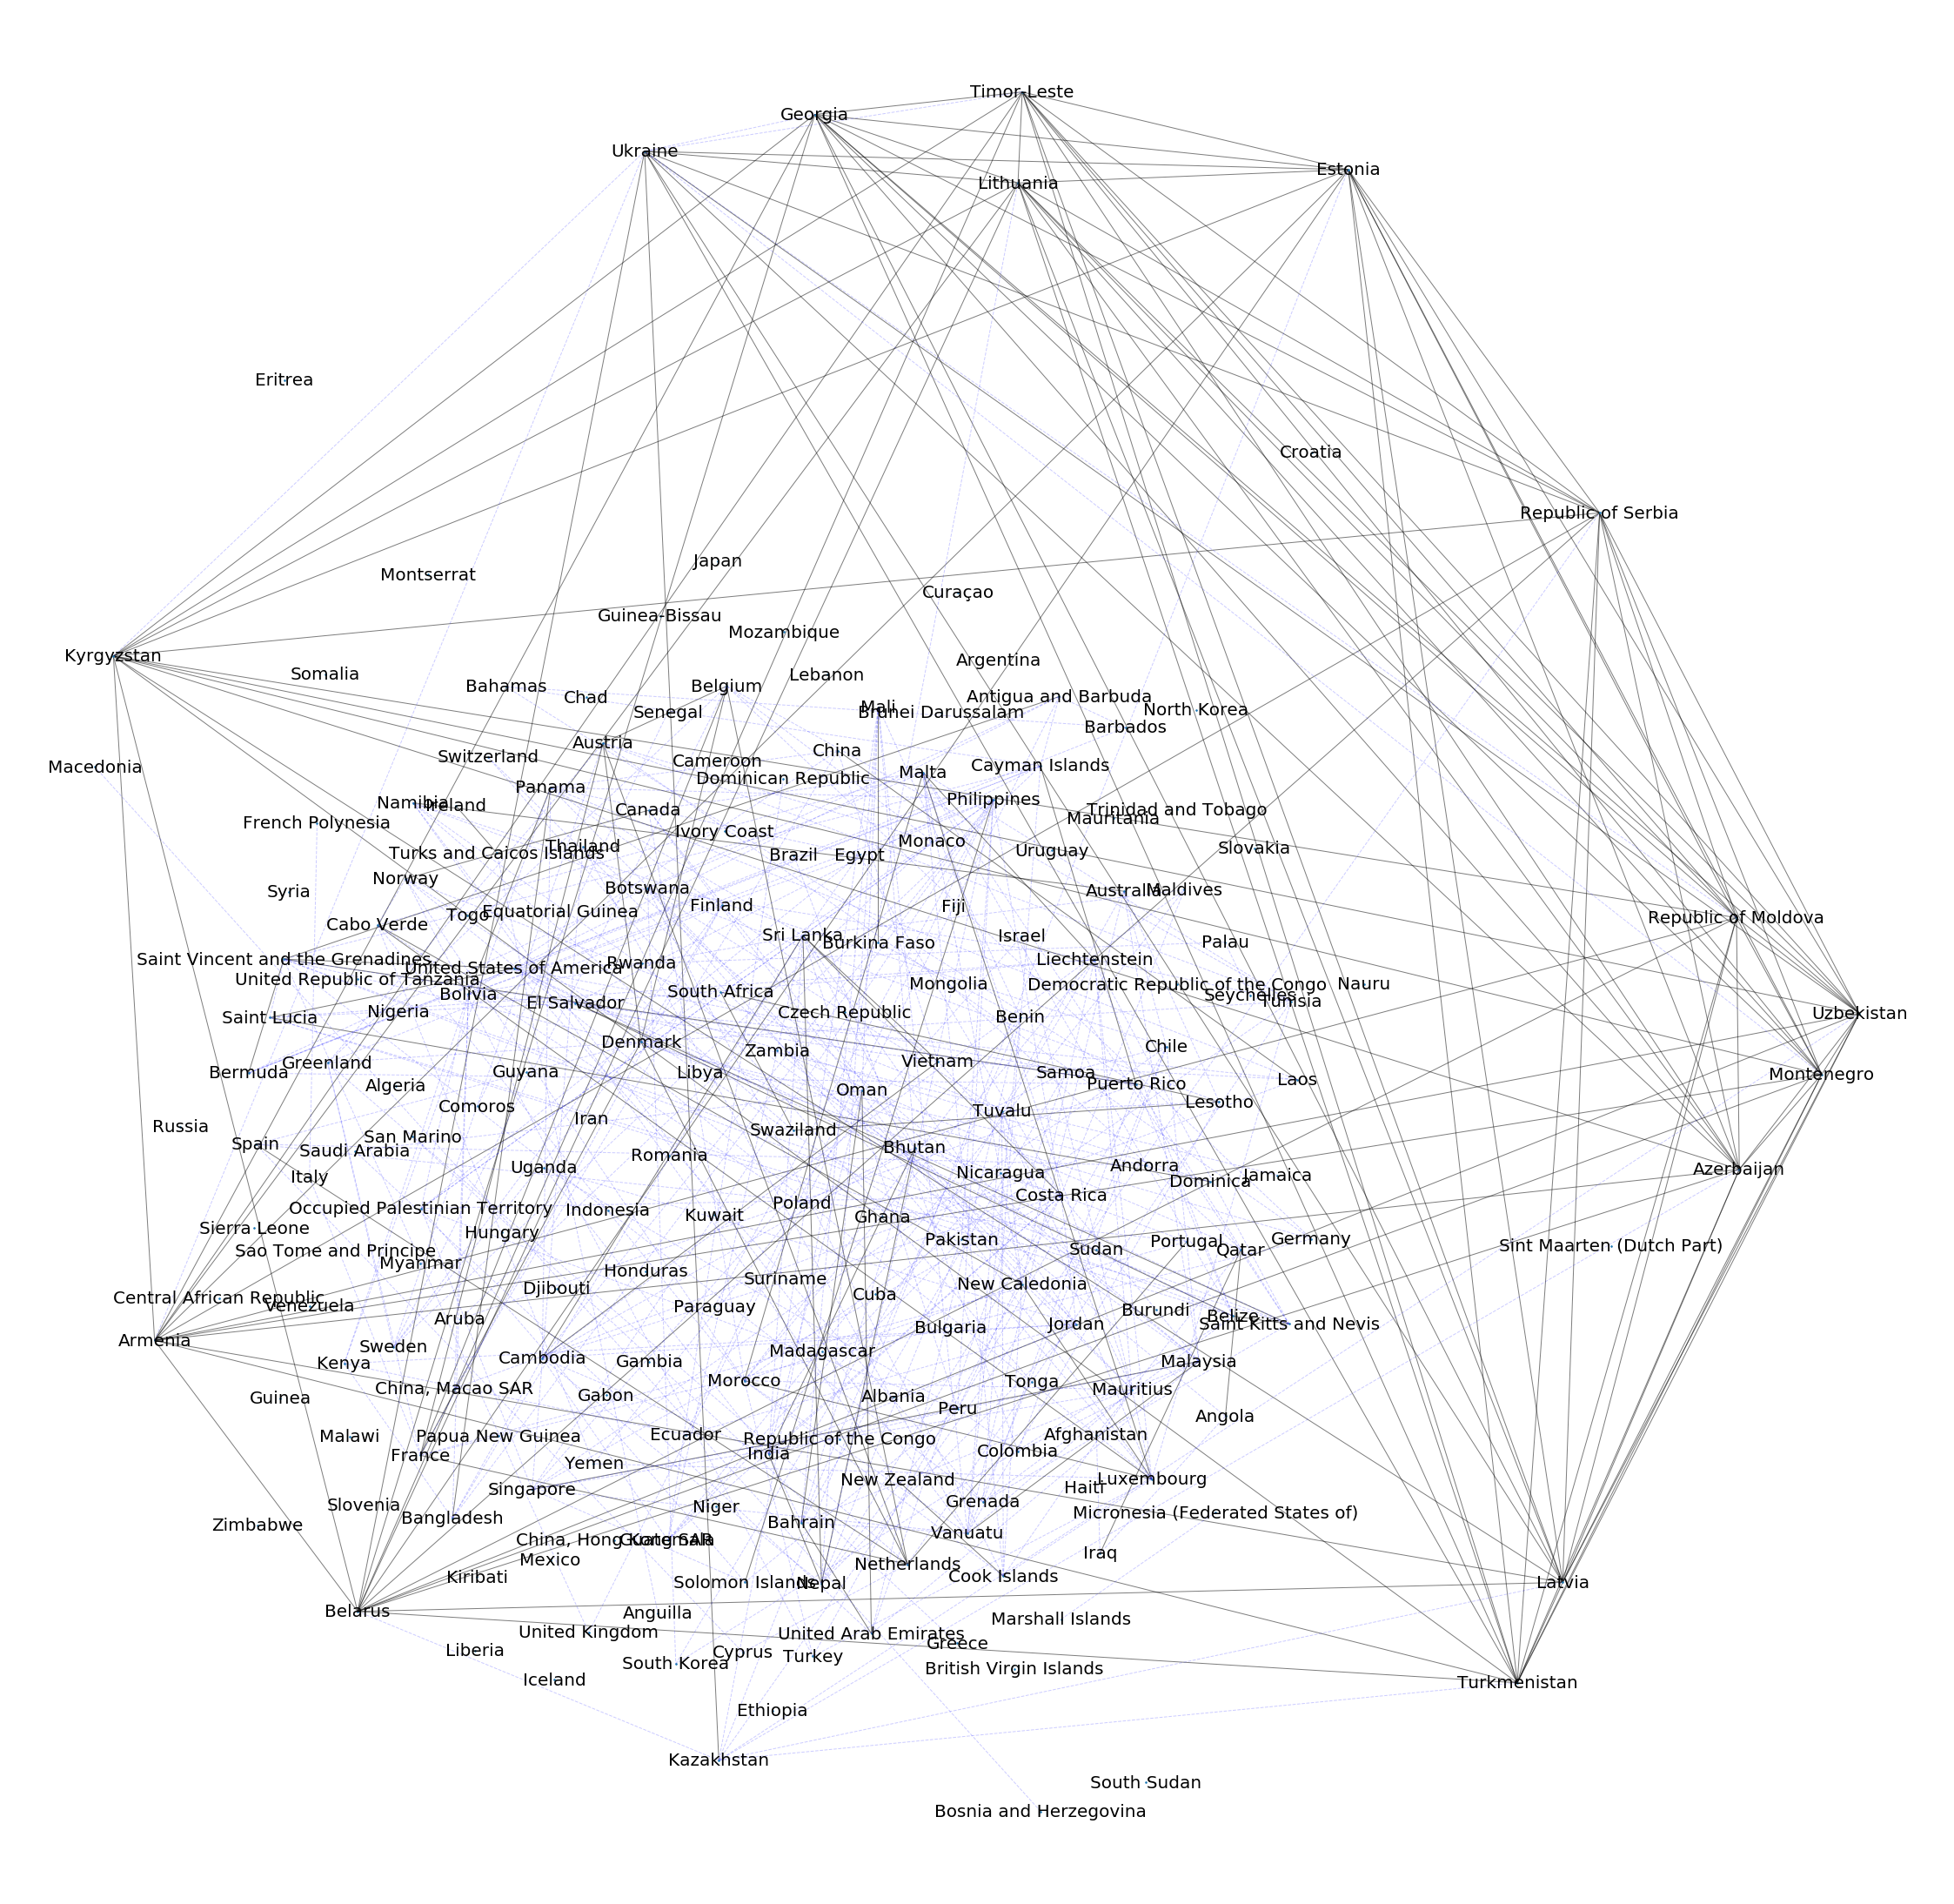

In [73]:
plt.figure(figsize=(40,40))

G =  nx.from_pandas_adjacency(pivoted_GDP_df.corr())

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.995]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.99 < d['weight'] <= 0.995]

pos = nx.spring_layout(G, k=2)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_shape='.')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=1, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.2, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

#### 2.D. Economic classification of countries <a name="2D"></a>
Below, we plot the distribution of GDP over the world for the last decades:

In [74]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df["(GDP, million $)"]
interact(lambda x: visualise_world_data_folium(plot,'Value',x,'GDP [Mil USD]'),x=(1990,2010,1))

//anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


interactive(children=(IntSlider(value=2000, description='x', max=2010, min=1990), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

The countries with high **GDP** indeed correpond to the most **developped countries**. The **trends we can observe** from those plots look **very significant** (USSR dissolution, China economic growth, ...)

# 3. Descriptive analysis <a name='3'></a>
3. 
    1. [Identifying the most important features](#3A)
        1. [Feature selection and model fiting](#3Aa)
        2. [Results](#3Ab)
    2. [Where are the most important features produced?](#3B)
    3. [Who are net importers and exporters of the features of interest?](#3C)
    4. [How is the self sufficiency distributed for the selected features?](#3D)
    

### A. Identifying the most important features<a name='3A'></a>

  a. Feature selection and mode fitting <a name='3Aa'></a>

In [75]:

def create_target_and_covariate_df(path_to_pkl):
    '''
    path_to_pkl: path to the pickle file.
    outputs two dataframes, one for the independant variables one for the dependant variables
    '''
    
    uni_df = pd.read_pickle(path_to_pkl)
    uni_df = uni_df.drop(columns=['Area', 'Year'])
    target_variables_df = uni_df[['(GDP, million $)', '(Consumer price indices, %)']]
    covariates_df = uni_df.drop(columns=['(GDP, million $)', '(Consumer price indices, %)'])
    
    return covariates_df, target_variables_df


def drop_feature_pearson_correlation(threshold, target_variable, target_variable_name, dataframe):
    
    '''
    threshold: the minimum amount of correlation required to keep the feature
    target_variable_name: string GDP or CPI
    normalised_dataset: the normalised dataset of feature
    target_variable: pandas series that contains the value of the target_varibale_name
    that we add to the normalised dataset
    
    '''
    copy_dataframe = dataframe.copy()
    copy_dataframe[target_variable_name] = target_variable
    cor = copy_dataframe.corr()
    cor_target = abs(cor[target_variable_name])
    
    relevant_features = cor_target[cor_target > threshold]
    
    return list(relevant_features.keys())

def drop_too_corelated_featues(threshold, dataframe):
    
    corr_matrix = dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return dataframe.drop(dataframe[to_drop], axis=1)
    

def feature_augmentation(degree, covariates_df):
    poly = PolynomialFeatures(degree)
    output_nparray =  poly.fit_transform(covariates_df)

    
    output_df = pd.DataFrame(output_nparray, columns = poly.get_feature_names(covariates_df.columns))
    
    return output_df

def split_and_standardization_dataset(target_variables, covariates, test_size, random, type_return = 'numpy'  ):
    
    '''
    
    target_variables: pandas dataframe that contains the target variables
    covariates: pandas dataframe that contains the independant variables
    test_size: the proportion of the dataset to include in the test split
    type_return: 'numpy' if return numpy array, 'pandas' if return pandas dataframe
    '''
    target_variables_numpy = target_variables.to_numpy()
    covariates_numpy = covariates.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(covariates_numpy, target_variables_numpy, test_size=test_size, random_state = random)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_normalized = scaler.transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    if type_return == 'numpy':
        
        return X_train_normalized, X_test_normalized, Y_train, Y_test
    
    elif type_return == 'pandas':
        
        X_test_normalized_df = pd.DataFrame(X_test_normalized, columns = list(covariates.columns))
        X_train_normalized_df = pd.DataFrame(X_train_normalized,columns= list(covariates.columns))
        Y_train_df = pd.DataFrame(Y_train, columns= list(target_variables.columns))
        Y_test_df = pd.DataFrame(Y_test, columns= list(target_variables.columns))
        
        return X_train_normalized_df, X_test_normalized_df, Y_train_df, Y_test_df

def fit_model_lasso(regularisation_parameters, covariates_df, target_df, nb_fold_CV):
    
    lasso = Lasso()
    
    parameters = {'alpha': regularisation_parameters}
    
    lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = nb_fold_CV)
    lasso_regressor.fit(covariates_df, target_df)

    best_param = lasso_regressor.best_params_['alpha']
    print('The best regularization parameter is ', best_param)


    lasso = Lasso(alpha=best_param)
    lasso.fit(covariates_df, target_df)
    return lasso.coef_
    
    
    
def RFECV_lasso_2(covariate, target,  random, nb_fold = 5,):
    
    cols = list(covariate.columns)
    X_train_, X_test_, Y_train_, Y_test_ = split_and_standardization_dataset(target, covariate, 0.2, type_return='numpy', random = random)
    #print('shape of Y_train_', Y_train_.shape, 'type of Y_train_', type(Y_train_))
    model = Lasso()
    
    rfecv = RFECV(estimator = model, step = 1, cv = nb_fold, scoring = 'neg_mean_squared_error')
    rfecv.fit(X_train_, np.ravel(Y_train_))
    print("Optimal number of features : %d" % rfecv.n_features_)
    
    temp = pd.Series(rfecv.support_,index = cols)
    selected_features = temp[temp==True].index

    print(selected_features)
    

    # plt.figure()
    # plt.xlabel("Number of features selected")
    # plt.ylabel("Cross validation score")
    # plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    # plt.show()
        
    return selected_features

In [76]:
def main(target_to_inspect = '(GDP, million $)'):

    RANDOM_SEED = 29
    
    reg_param = np.linspace(start = 0.01, stop= 1, num = 20)

    params = {

        'target' : target_to_inspect ,
        'name of target': 'GDP',
        'pearson correlation threshold': 0.4,
        'inter correlation threshold': 0.9, 
        'nb_fold_CV': 5, 
        'degree augmentation': 1,
        'regularization_parameter': reg_param
    }

    covariates_df, target_variables_df = create_target_and_covariate_df('./Scripts/Data/uni_df.pkl')
    target_variables_df.to_pickle('target.pkl')

    ### Below we select the top 20 features in production:

    Production_cov_df = covariates_df.filter(regex= 'production|Production')
    summed_df = Production_cov_df.sum()
    keys = summed_df.keys()
    values = summed_df.values
    sorted_keys = [key for _,key in sorted(zip(values,keys))]
    Production_cov_df = Production_cov_df[sorted_keys[-20:]]
    selected_features_production = list(Production_cov_df.columns.values) # Selected features for top 20 prod features in volumne

    cropped_word_selected_prod = [" ".join(string.split()[:-3]) for string in selected_features_production] # Same as the list above with only the important words kept


    

   ### Below we are selecting the features in export that have been selected previously with the production
    export_df = covariates_df.filter(regex= 'export')
    

    columns_to_keep_export = []

    for column_export in list(export_df.columns.values):

        for columns_prod in cropped_word_selected_prod:

            if columns_prod in column_export:

                columns_to_keep_export.append(column_export)


    ### Below we are selecting the features in import that have been selected previously with the production
    import_df = covariates_df.filter(regex= 'import')
    

    columns_to_keep_import = []

    for column_import in list(import_df.columns.values):

        for columns_prod in cropped_word_selected_prod:

            if columns_prod in column_import:

                columns_to_keep_import.append(column_import)

    


    final_features_kept = selected_features_production + columns_to_keep_export + columns_to_keep_import  # All the selected features
   
    covariates_df = covariates_df[final_features_kept]
    


    list_selected_features_GDP = drop_feature_pearson_correlation(params['pearson correlation threshold'], target_variables_df[params['target']], params['name of target'], covariates_df)
    covariate_reduced_df = covariates_df[list_selected_features_GDP[:-1]]
    covariate_reduced_df = drop_too_corelated_featues(params['inter correlation threshold'], covariate_reduced_df)
    covariate_reduced_df.to_pickle("reduced_df_2.pkl")
    print('list of selected features after reduction', list(covariate_reduced_df.columns.values))
    
    regularisation_parameters = params['regularization_parameter']

    target_df = target_variables_df[params['target']]

    nb_fold_CV = params['nb_fold_CV']

    param_lasso = fit_model_lasso(regularisation_parameters, covariate_reduced_df, target_df, nb_fold_CV = nb_fold_CV )

    keys = list(covariate_reduced_df.columns.values)
    
    values = param_lasso
   
    return dict(zip(keys, values))

weights=main('(GDP, million $)')

list of selected features after reduction ['Soybeans Crops Production tonnes', 'Tomatoes Crops Production tonnes', 'Maize Crops Production tonnes', 'Turkeys Livestock production Head', 'Maize Food export quantities tonnes', 'Maize, green Food export quantities tonnes', 'Wheat Food export quantities tonnes', 'Cattle Live animals import quantities Head', 'Oats Food import quantities tonnes', 'Pigs Live animals import quantities Head', 'Tomatoes Food import quantities tonnes', 'Turkeys Live animals import quantities Head']


//anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88269505930363.5, tolerance: 616213877638.2041
  positive)
//anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52106333384857.0, tolerance: 641076863381.032
  positive)


The best regularization parameter is  0.01


//anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25251481765867.0, tolerance: 650584559072.4933
  positive)
//anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25251481765867.0, tolerance: 650584559072.4933
  positive)


In [77]:
weights

{'Soybeans Crops Production tonnes': 0.016904551719883004,
 'Tomatoes Crops Production tonnes': 0.04600299893471108,
 'Maize Crops Production tonnes': 0.019112555979080598,
 'Turkeys Livestock production Head': 0.00045609049200977524,
 'Maize Food export quantities tonnes': -0.06316454222878906,
 'Maize, green Food export quantities tonnes': 52.082838493928676,
 'Wheat Food export quantities tonnes': 0.0075799594660751575,
 'Cattle Live animals import quantities Head': 0.03663454785851955,
 'Oats Food import quantities tonnes': 0.48376570716305617,
 'Pigs Live animals import quantities Head': 0.05776106945901765,
 'Tomatoes Food import quantities tonnes': 2.5686557773141767,
 'Turkeys Live animals import quantities Head': 0.04929538371588062}

**Above, we see the features identified as the most important by our regression model**

We find that the  goods that most influence the GDP are soybean, tomatoes, Maize, Wheat , Cattle live animals and pigs amongst other. 

It is an interesting result that is easily understandable. Take soybean for example. This crop is one of the most produced. The mains exporter are the US, Brasil and Argentina and the main importer is China. Around 330 millions tonnes of soybean was produced in 2018. It is vastly used to feed animals. It is thus coherent to see such an important good be selected by our model. We see also that wheat, oats, cattle live and pigs are present. This again is easily understandable. It is sufficient to look at our eating habit to convince ourself that those goods plays an important role in the GDP. 

## B. Where are the most important features produced? <a name='3B'></a>

After having identified the most important features with our prediction model, we want to have a look as to where they are produced.  

The first step is to select to columns corresponding to the production of the features of interest within our dataframe.

In [78]:
features=list(weights.keys())
pickle_file="Scripts/Data/uni_df.pkl"
df=pickle.load(open(pickle_file,'rb'))
df=df.set_index(['Area','Year'])

#To select the production of the features of interest, the dataframe is filtered with each feature. To reduce computation cost, the result is stored in a dictionnary and when all the features are treated turned into
#a pandas DataFrame

dic_to_plot={}

for feature in features:
    
    if 'Production' in feature or 'production' in feature:
        if len(df.filter(regex=feature).columns)==0:
            print('{} not found'.format(c))
        else:
            dic_to_plot.update(df.filter(regex=feature).to_dict())
            
    else:
        s=re.split(' Food| Live',feature)[0]
        cols=[c for c in df.columns if re.split(' Crop| Food| Live',c)[0]==s and re.search('Production|production',c)]
        
        if cols==0:
            print('{} not found'.format(feature))
        else:
            dic_to_plot.update(df[cols].to_dict())
            
prod_to_plot=pd.DataFrame(dic_to_plot)
prod_to_plot=prod_to_plot.reset_index().rename(columns={'level_0':'Area','level_1':'Year'})

#### Let's dive into the maps!

In [79]:
columns=[c for c in prod_to_plot.columns if c!='Area' and c!='Year']
for c in columns:
    print(c)
    display(interact(lambda x : visualise_world_data_folium(prod_to_plot,c,x,c,log2=True),x=(1970,2014,1)))


Soybeans Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Tomatoes Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Turkeys Livestock production Head


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize, green Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Wheat Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Cattle Livestock production Head


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Oats Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Pigs Livestock production Head


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Globally, all features that we identified seem to follow a common trend. The biggest producers are in almost all categories China, the USA and brazil. Russia, France, Spain, Germany seem to get closer to their volumes. The rest of Europe is situated in the second or third tier of producer as well as the other developed countries (Australia, Canada, south American countries). In the majority of categories, north and south African countries are situated in the some orders of magnitude as developed countries. A general trend to observe is that central African countries seem to produce very few resources in comparison to the rest of the world. The only feature going against this general description seems to be the cattle. The production of cattle appears to be very well distributed throughout the world. The production of pigs also seem well distributed throughout the world except for countries excluding pork from their diet for religious purposes. The phenomenon might be explained by the increased difficulty in transporting these goods. Live animals and meat transport is much more complicated than grain, vegetables or forage. Meaning that the countries would generally produce what they need in term of meat and rather import crops or vegetables.  

The general trend we observe is that developed countries are bigger producers. This makes sense considering how we selected these features. Our regression model gives us the features that are connected with a high GDP thus the features selected will be markers of rich countries.

What can be found surprising is the stability of the producer ranking throughout the years. The top producers 50 years ago are still the top producers nowadays. It is also worth noting that globally, even though the ranking does not change, the sheer production volume follows a growing trend.

In [80]:
#Exporting the results as HTML files
import os
import shutil

#Generate result files

#if needed, creating result directory
if not os.path.exists('./Scripts/Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
if not os.path.exists('./Scripts/Data/ResultsJulien/Producers'):
        os.mkdir('./Scripts/Data/ResultsJulien/Producers')
        
for c in prod_to_plot.columns:
    if c!='Year' and c!='Area':
        
        #if the dir already exists, remove it and create fresh one
        if os.path.exists('./Scripts/Data/ResultsJulien/Producers/{}'.format(c)):
            shutil.rmtree('./Scripts/Data/ResultsJulien/Producers/{}'.format(c))
        #wait for the deletion to be complete
        while os.path.exists('./Scripts/Data/ResultsJulien/Producers/{}'.format(c)):
            continue
        os.mkdir('./Scripts/Data/ResultsJulien/Producers/{}'.format(c))
        
        for year in range(1970,2015,1):
            m=visualise_world_data_folium(prod_to_plot,c,year,c,log2=True)
            save_name='./Scripts/Data/ResultsJulien/Producers/{}/{}_{}.html'.format(c,c,year)
            m.save(save_name)

## C.  Who are the importers and exporters of the features of interest? <a name="3C"></a>

For the next milestone, this part will be put to the end of the file and conducted for **specific agricultural features** (e.g. trade of crop most highly correlated to GDP) after the **most important ones** have been **identified**.

In [81]:
def net_import_export(uni_df,weights):
    
    #This method return a dataframe containing the net trade balance for each country for each year for the features of interest
    
    exports_df=uni_df.set_index(['Area','Year']).filter(regex="export")
    imports_df=uni_df.set_index(['Area','Year']).filter(regex="import")

    e_cols=[]
    i_cols=[]
    popped=[]
    for feature in weights.keys():
        if feature not in popped:
            s=re.split(' Food| Live| Crops',feature)[0]
            for f in features:
                f_split=re.split(' Food| Live| Crops',f)[0]
                if f_split==s:
                    popped.append(f)
            e_cols.extend([c for c in list(exports_df.columns) if re.split(' Food| Live| Crops',c)[0]==s])
            i_cols.extend([c for c in list(imports_df.columns) if re.split(' Food| Live| Crops',c)[0]==s])

    exports_df=exports_df[e_cols]
    imports_df=imports_df[i_cols]

    e_col_dic={c:re.split(' Food| Live| Crops',c)[0] for c in exports_df.columns}
    i_col_dic={c:re.split(' Food| Live| Crops',c)[0] for c in imports_df.columns}



    exports_df=exports_df.rename(columns=e_col_dic)
    imports_df=imports_df.rename(columns=i_col_dic)

    net_df=exports_df.subtract(imports_df)
    
    return net_df

In [82]:
net_df =net_import_export(uni_df,weights)
net_df.reset_index(inplace=True)

for c in net_df.columns:
    if c!='Year' and c!='Area':
        print(c,'\n')
        display(interact(lambda x : visualise_world_data_folium(net_df,c,x,c+" [Tonnes or Heads]",log2=True),x=(1970,2014,1)))

Soybeans 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Tomatoes 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Turkeys 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize, green 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Wheat 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Cattle 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Oats 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Pigs 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

In [ ]:
#Exporting the results as HTML files
import os
import shutil

#Generate result files

#if needed, creating result directory
if not os.path.exists('./Scripts/Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
if not os.path.exists('./Scripts/Data/ResultsJulien/Trade'):
        os.mkdir('./Scripts/Data/ResultsJulien/Trade')
        
for c in net_df.columns:
    if c!='Year' and c!='Area':
        
        #if the dir already exists, remove it and create fresh one
        if os.path.exists('./Scripts/Data/ResultsJulien/Trade/{}'.format(c)):
            shutil.rmtree('./Scripts/Data/ResultsJulien/Trade/{}'.format(c))
        #wait for the deletion to be complete
        while os.path.exists('./Scripts/Data/ResultsJulien/Trade/{}'.format(c)):
            continue
        os.mkdir('./Scripts/Data/ResultsJulien/Trade/{}'.format(c))
        
        for year in range(1970,2014,1):
            m=visualise_world_data_folium(net_df,c,year,c,log2=True)
            save_name='./Scripts/Data/ResultsJulien/Trade/{}/{}_{}.html'.format(c,c,year)
            m.save(save_name)

## D. How is the self sufficiency distributed for the selected features? <a name="3D"></a>
In this chapter, we take a look at the self suficiency score of the countries around the world and we focus on the agricultural features identified by our model.

In [ ]:
pickle_file="Scripts/Data/uni_df.pkl"
df=pickle.load(open(pickle_file,'rb'))
sc=compute_self_suficiency(df,weights)
sc.reset_index(inplace=True)
sc=sc.rename(columns={'level_0':'Area','level_1':'Year'})

In [ ]:
interact(lambda x: visualise_world_data_folium(sc,'Agg',x,'Self Sufficiency score',log2=True),x=(1970,2015))

Unlike the production ranking, the self sufficiency score seems to be pretty instable. It is interesting to note that the countries who were by far top producers do no stand out early on. For instance China does not appear in the highest score until 1990. The most surprising results come from African countries such as South Africa, the United Republic of Tanzania, Nigeria and the Ivory Coast that constantly have a score competing with the richest countries which was unexpected. Even though the general trend tends to show that richer countries are more independent, there are outliers and the score seems to have a pretty high variance

In [ ]:
# This field generates the results and exports them as HTML files (1 map per year)

import os
import shutil

#Generate result files

#if needed, create result directories
if not os.path.exists('./Scripts//Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
    
#if directory already exists delete it
if os.path.exists('./Scripts/Data/ResultsJulien/SelfSufficiency'):
    shutil.rmtree('./Scripts/Data/ResultsJulien/SelfSufficiency')

#While loop necessary to wait until the tree is deleted
while os.path.exists('./Scripts/Data/ResultsJulien/SelfSufficiency'):
    continue
    
os.mkdir('./Scripts/Data/ResultsJulien/SelfSufficiency')
    

for year in range(1970,2016,1):
            m=visualise_world_data_folium(sc,'Agg',year,'Self Sufficiency Score',log2=True)
            save_name='./Scripts/Data/ResultsJulien/SelfSufficiency/self_suf_{}.html'.format(year)
            m.save(save_name)